 # <center> Web Scraping, Exploratory Data Analysis, and Predictive Modeling </center>
 

## Table of Contents

#### Part 1: Scraping Top 1000 IMDB Movies Data
1. [Import Libraries](#1.-Import-Libraries)
2. [Data Crawling](#2.-Data-Crawling)
3. [DataFrame Building](#3.-DataFrame-Building)
4. [Description of the Dataset](#4.-Description-of-the-Dataset)

#### Part 2: Exploratory Data Analysis (EDA)
1. [Import More Libraries](#1.-Import-More-Libraries)
2. [Initial Summaries](#2.-Initial-Summaries)
3. [Convert Data Types](#3.-Convert-Data-Types)
4. [Check Missing Values](#4.-Check-Missing-Values)
5. [Visualization and In-depth Analysis](#5.-Visualization-and-In-depth-Analysis)
    - 5.1. [Numerical Variables Analysis](#5.1.-Numerical-Variables-Analysis)
    - 5.2. [Categorical Variables Analysis](#5.2.-Categorical-Variables-Analysis)
    - 5.3. [Correlation Analysis](#5.3.-Correlation-Analysis)
    - 5.4. [Trends and Time Series Analysis](#5.4.-Trends-and-Time-Series-Analysis)
    - 5.5. [Rating Factor Comparison](#5.5.-Rating-Factor-Comparison)
    - 5.6. [Duration Factor Comparison](#5.6.-Duration-Factor-Comparison)
    - 5.7. [Text Data Analysis](#5.7.-Text-Data-Analysis)
6. [Re-summarize Key Insights](#6.-Re-summarize-Key-Insights)

## Goals

In this exploration of the top 1000 IMDB movies, I will take you on a journey through the captivating realm of cinema. We will dive deep into the dataset, extracting valuable insights and answering intriguing questions. Get ready to uncover the stories behind the numbers and discover the patterns that shape the world of filmmaking.

Throughout our exploration, we will address several key questions:

1. **How has the landscape of cinema evolved over the years?**
2. **What do content ratings reveal about movie audiences?**
3. **Does the duration of a movie impact its reception?**
4. **Which genres have dominated the movie scene and why?**
5. **What is the relationship between audience ratings and critical scores?**
6. **How do directors and star cast influence a movie's success?**
7. **What role do votes and gross earnings play in successful movies?**
8. **What themes and narratives are prevalent in movie descriptions?**
9. **What are the overarching insights and takeaways from our analysis?**

Join me in this journey as we uncover the magic that lies within the world of movies!

# Part 1: Scraping Top 1000 IMDB Movies Data

This section will focus on scraping data from the Top 1000 IMDb Movies list. The objective is to gather essential information about these movies for further analysis. Data will be collected from the IMDb website, providing valuable insights into the world of cinema.

## 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

## 2. Data Crawling

In [2]:
movie_names = []
years_of_release = []
content_ratings = []
durations = []
genres = []
ratings = []
metascores = []
descriptions = []
directors = []
stars_list = []
votes_list = []
gross_list = []

In [3]:
url_template = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={start}&ref_=adv_nxt"

headers = {
    'Accept-Language': 'en-US,en;q=0.9',  
}

total_titles = 1000

for start in range(1, total_titles + 1, 100):
    url = url_template.format(start=start)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    data = soup.findAll('div', attrs= {'class': "lister-item mode-advanced"})
    
    for item in data:
        movie_name = item.h3.a.text
        movie_names.append(movie_name)

        year_release = item.find('span', class_='lister-item-year text-muted unbold').text.strip('()')
        years_of_release.append(year_release)

        content_rating_element = item.p.find('span', class_='certificate')
        content_rating = content_rating_element.text if content_rating_element else "N/A"
        content_ratings.append(content_rating)

        duration = item.p.find('span', class_='runtime').text.replace(' min', '')
        durations.append(duration)

        genre = item.p.find('span', class_='genre').text.strip().replace('\n', '')
        genres.append(genre)

        rating = item.find('div', class_='inline-block ratings-imdb-rating').find('strong').text
        ratings.append(rating)

        metascore = item.find('span', class_='metascore').text.strip() if item.find('span', class_='metascore') else "N/A"
        metascores.append(metascore)

        description = item.find('p', class_='text-muted').find_next_sibling('p').text.strip()
        descriptions.append(description)

        directors_stars = item.find('p', class_='').text.split('|')
        director = directors_stars[0].split(':')[1].strip()
        directors.append(director)

        star = directors_stars[1].split(':')[1].strip().split(', ')
        cleaned_star = [s.strip() for s in star if s.strip() != '']
        stars_list.append(cleaned_star)

        votes_element = item.find('span', class_='text-muted', string='Votes:')
        vote = votes_element.find_next_sibling('span', attrs={'name': 'nv'}).text if votes_element else None
        votes_list.append(vote)

        gross_element = item.find('span', class_='text-muted', string='Gross:')
        gross = gross_element.find_next_sibling('span', attrs={'name': 'nv'}).text if gross_element else None
        gross_list.append(gross)

## 3. DataFrame Building

In [4]:
data_dict = {
    "Movie Name": movie_names,
    "Year of Release": years_of_release,
    "Content Rating": content_ratings,
    "Duration": durations,
    "Genre": genres,
    "Rating": ratings,
    "Metascore": metascores,
    "Description": descriptions,
    "Director": directors,
    "Stars": stars_list,
    "Votes": votes_list,
    "Gross": gross_list
}

df = pd.DataFrame(data_dict)
df

Movie Name Year of Release Content Rating Duration  \
0    The Shawshank Redemption            1994              R      142   
1               The Godfather            1972              R      175   
2             The Dark Knight            2008          PG-13      152   
3            Schindler's List            1993              R      195   
4       The Godfather Part II            1974              R      202   
..                        ...             ...            ...      ...   
995                 Philomena            2013          PG-13       98   
996    A Very Long Engagement            2004              R      133   
997                     Shine            1996          PG-13      105   
998         The Invisible Man            1933          TV-PG       71   
999                  Cell 211            2009            N/A      113   

                         Genre Rating Metascore  \
0                        Drama    9.3        82   
1                 Crime, Drama    9.2       100   
2         Action, Crime, Drama    9.0        84   
3    Biography, Drama, History    9.0        95   
4                 Crime, Drama    9.0        90   
..                         ...    ...       ...   
995   Biography, Comedy, Drama    7.6        77   
996    Drama, Mystery, Romance    7.6        76   
997    Biography, Drama, Music    7.6        87   
998             Horror, Sci-Fi    7.6        87   
999       Action, Crime, Drama    7.6       N/A   

                                           Description              Director  \
0    Over the course of several years, two convicts...        Frank Darabont   
1    Don Vito Corleone, head of a mafia family, dec...  Francis Ford Coppola   
2    When the menace known as the Joker wreaks havo...     Christopher Nolan   
3    In German-occupied Poland during World War II,...      Steven Spielberg   
4    The early life and career of Vito Corleone in ...  Francis Ford Coppola   
..                                                 ...                   ...   
995  A world-weary political journalist picks up th...        Stephen Frears   
996  Tells the story of a young woman's relentless ...    Jean-Pierre Jeunet   
997  Pianist David Helfgott, driven by his father a...           Scott Hicks   
998  A scientist finds a way of becoming invisible,...           James Whale   
999  The story of two men on different sides of a p...         Daniel Monzón   

                                                 Stars      Votes     Gross  
0    [Tim Robbins, Morgan Freeman, Bob Gunton, Will...  2,787,294   $28.34M  
1    [Marlon Brando, Al Pacino, James Caan, Diane K...  1,940,977  $134.97M  
2    [Christian Bale, Heath Ledger, Aaron Eckhart, ...  2,766,703  $534.86M  
3    [Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...  1,402,134   $96.90M  
4    [Al Pacino, Robert De Niro, Robert Duvall, Dia...  1,318,961   $57.30M  
..                                                 ...        ...       ...  
995  [Judi Dench, Steve Coogan, Sophie Kennedy Clar...    102,453   $37.71M  
996  [Audrey Tautou, Gaspard Ulliel, Jodie Foster, ...     75,092    $6.17M  
997  [Geoffrey Rush, Armin Mueller-Stahl, Justin Br...     55,669   $35.81M  
998  [Claude Rains, Gloria Stuart, William Harrigan...     37,918      None  
999  [Luis Tosar, Alberto Ammann, Antonio Resines, ...     69,561      None  

[1000 rows x 12 columns]

## 4. Description of the Dataset

Information about variables in the dataset I have collected:

- **Movie Name**: The name of the movie
- **Year of Release**: The year the movie was released
- **Content Rating**: The content rating of the movie
- **Duration**: The duration of the movie in minutes
- **Genre**: The genre(s) of the movie
- **Rating**: The IMDb rating of the movie
- **Metascore**: The Metascore rating of the movie
- **Description**: A brief description of the movie
- **Director**: The director of the movie
- **Stars**: The main stars of the movie
- **Votes**: The number of votes the movie has received
- **Gross Earnings**: The gross earnings of the movie (in million dollars)


In [5]:
df.to_csv('top_1000_imdb_movies_data.csv', index=False)

# Part 2: Exploratory Data Analysis


## 1. Import More Libraries

In [6]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'
sns.set_theme(style='ticks')

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [7]:
original_df = pd.read_csv('top_1000_imdb_movies_data.csv')
print(original_df.shape)
original_df.head()

(1000, 12)


Movie Name Year of Release Content Rating  Duration  \
0  The Shawshank Redemption            1994              R       142   
1             The Godfather            1972              R       175   
2           The Dark Knight            2008          PG-13       152   
3          Schindler's List            1993              R       195   
4     The Godfather Part II            1974              R       202   

                       Genre  Rating  Metascore  \
0                      Drama     9.3       82.0   
1               Crime, Drama     9.2      100.0   
2       Action, Crime, Drama     9.0       84.0   
3  Biography, Drama, History     9.0       95.0   
4               Crime, Drama     9.0       90.0   

                                         Description              Director  \
0  Over the course of several years, two convicts...        Frank Darabont   
1  Don Vito Corleone, head of a mafia family, dec...  Francis Ford Coppola   
2  When the menace known as the Joker wreaks havo...     Christopher Nolan   
3  In German-occupied Poland during World War II,...      Steven Spielberg   
4  The early life and career of Vito Corleone in ...  Francis Ford Coppola   

                                               Stars      Votes     Gross  
0  ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...  2,787,294   $28.34M  
1  ['Marlon Brando', 'Al Pacino', 'James Caan', '...  1,940,977  $134.97M  
2  ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...  2,766,703  $534.86M  
3  ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...  1,402,134   $96.90M  
4  ['Al Pacino', 'Robert De Niro', 'Robert Duvall...  1,318,961   $57.30M

I will keep the original dataframe intact.

In [8]:
df = original_df.copy()


## 2. Initial Summaries

In [9]:
df.describe()

Duration       Rating   Metascore
count  1000.000000  1000.000000  846.000000
mean    124.167000     7.969300   79.024823
std      28.684629     0.275142   11.974158
min      45.000000     7.600000   28.000000
25%     103.000000     7.800000   71.250000
50%     120.000000     7.900000   80.000000
75%     138.250000     8.100000   88.000000
max     321.000000     9.300000  100.000000

**Note:**

The table presents the descriptive statistics for the numeric columns within the Top 1000 IMDB Movies DataFrame. These columns are `Duration`, `Rating`, and `Metascore`. Here are some key observations:

- The mean duration of movies in the dataset is approximately 124 minutes, suggesting the average length of films.
- Movies in the dataset have an average rating of 7.97 out of 10, reflecting positive reception overall.
- The average Metascore, which is 79.02, is notably similar to the average rating, indicating some alignment between critic and audience evaluations.
- The shortest movie in the top 1000 is 45 minutes in duration, whereas the longest film spans 321 minutes, roughly seven times longer.
- The highest rating for a movie is 9.3, while the lowest rating is 7.6. Comparatively, the Metascores exhibit a wider range, with the highest score reaching a perfect 100. However, the lowest Metascore is substantially lower, at just 28.
- It's evident that there are missing Metascore values, as only 846 entries are present in this column.

In [10]:
df.describe(include='object')

Movie Name Year of Release Content Rating  Genre  \
count                   1000            1000            984   1000   
unique                   994             123             16    193   
top     Beauty and the Beast            2014              R  Drama   
freq                       2              28            358     92   

                                              Description          Director  \
count                                                1000              1000   
unique                                               1000               582   
top     Over the course of several years, two convicts...  Alfred Hitchcock   
freq                                                    1                12   

                                                    Stars      Votes   Gross  
count                                                1000       1000     808  
unique                                                998       1000     704  
top     ['Prabhas', 'Rana Daggubati', 'Anushka Shetty'...  2,787,294  $0.01M  
freq                                                    2          1       8

**Note:**

The table encompasses descriptive statistics for the object columns within the Top 1000 IMDB Movies DataFrame. These columns include `Movie Name`, `Year of Release`, `Content Rating`, `Genre`, `Description`, `Director`, `Stars`, `Votes`, and `Gross`. Here are notable observations:

- The presence of 994 unique movie names suggests instances of movie title duplication or remakes, such as "Beauty and the Beast," indicating potential reiterations across the dataset.

- With over 123 unique years of release, there appears to be a diverse span of years represented in the dataset, potentially encompassing a wide range of cinematic eras.

- The year 2014 stands out as a particularly successful year, boasting the highest number of movies (28) within the top 1000 IMDB list.

- "R" rated films emerge as the most prevalent among the 16 content ratings, with 358 instances. This prevalence might reflect a correlation between more mature content and favorable audience scores.

- The dominant genre across the dataset is "Drama".

- Alfred Hitchcock emerges as the director with the highest number of films (12) within the top 1000.

- Stars don't give much information so I need to work on this later to generate some insights such as who are the most succesful actors

- The highest votes for a film is over 2.7 million votes.

- The presence of 808 values in the "Gross" column implies some instances of missing revenue data. Additionally, the surprising revelation of 8 movies generating no revenue adds an intriguing layer to the analysis.


## 3. Convert Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       1000 non-null   object 
 1   Year of Release  1000 non-null   object 
 2   Content Rating   984 non-null    object 
 3   Duration         1000 non-null   int64  
 4   Genre            1000 non-null   object 
 5   Rating           1000 non-null   float64
 6   Metascore        846 non-null    float64
 7   Description      1000 non-null   object 
 8   Director         1000 non-null   object 
 9   Stars            1000 non-null   object 
 10  Votes            1000 non-null   object 
 11  Gross            808 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


**Note:** 

The dataset consists of 12 columns:
- **Float** Dtype: `Rating` and `Metascore`
- **Integer** Dtype: `Watch Time` is of integer type.
- **Object** Dtype: The other variables, namely `Movie Name`, `Year of Release`, `Content Rating`, `Genre`, and `Description`, `Director`, `Stars`, `Votes` and `Gross`.

It becomes evident that certain columns require data type adjustments to facilitate Exploratory Data Analysis (EDA). Specifically:
- `Year of Release` and `Votes` need to be converted to integer data types.
- `Gross` should be transformed to a float data type.

These adjustments are essential to ensure accurate analysis and interpretation during the EDA process.

### `Year of Release`
There's error when I try to convert `Year of Release` into integer, indicating some special values. I will check if `Year of Release` has more than 4 letters before attempting to convert it to integer.

In [12]:
print(f"Rows with 'Year Of Release' more than 4 characters: {len(df[df['Year of Release'].str.len() > 4])}")

df[df['Year of Release'].str.len() > 4].head(10)

Rows with 'Year Of Release' more than 4 characters: 35


Movie Name Year of Release Content Rating  Duration  \
59             96       II) (2018      Not Rated       158   
62          Joker        I) (2019              R       122   
74           Coco        I) (2017             PG       105   
165    The Father        I) (2020          PG-13        97   
237    Inside Out        I) (2015             PG        95   
244          Room        I) (2015              R       118   
246     Spotlight        I) (2015              R       129   
250          Rush        I) (2013              R       123   
331          Pink      III) (2016      Not Rated       136   
352  The Revenant        I) (2015              R       156   

                            Genre  Rating  Metascore  \
59                 Drama, Romance     8.5        NaN   
62         Crime, Drama, Thriller     8.4       59.0   
74    Animation, Adventure, Drama     8.4       81.0   
165                Drama, Mystery     8.2       88.0   
237  Animation, Adventure, Comedy     8.1       94.0   
244               Drama, Thriller     8.1       86.0   
246       Biography, Crime, Drama     8.1       93.0   
250      Action, Biography, Drama     8.1       74.0   
331        Crime, Drama, Thriller     8.1        NaN   
352      Action, Adventure, Drama     8.0       76.0   

                                           Description  \
59   Two high school sweethearts meet at a reunion ...   
62   The rise of Arthur Fleck, from aspiring stand-...   
74   Aspiring musician Miguel, confronted with his ...   
165  A man refuses all assistance from his daughter...   
237  After young Riley is uprooted from her Midwest...   
244  A little boy is held captive in a room with hi...   
246  The true story of how the Boston Globe uncover...   
250  The merciless 1970s rivalry between Formula On...   
331  When three young women are implicated in a cri...   
352  A frontiersman on a fur trading expedition in ...   

                             Director  \
59                      C. Prem Kumar   
62                      Todd Phillips   
74       Lee Unkrich, \nAdrian Molina   
165                    Florian Zeller   
237  Pete Docter, \nRonnie Del Carmen   
244                  Lenny Abrahamson   
246                      Tom McCarthy   
250                        Ron Howard   
331           Aniruddha Roy Chowdhury   
352             Alejandro G. Iñárritu   

                                                 Stars      Votes     Gross  
59   ['Vijay Sethupathi', 'Adithya Bhaskar', 'Trish...     33,817       NaN  
62   ['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...  1,390,082  $335.45M  
74   ['Anthony Gonzalez', 'Gael García Bernal', 'Be...    549,871  $209.73M  
165  ['Anthony Hopkins', 'Olivia Colman', 'Mark Gat...    175,346       NaN  
237  ['Amy Poehler', 'Bill Hader', 'Lewis Black', '...    749,855  $356.46M  
244  ['Brie Larson', 'Jacob Tremblay', 'Sean Bridge...    436,772   $14.68M  
246  ['Mark Ruffalo', 'Michael Keaton', 'Rachel McA...    487,646   $45.06M  
250  ['Daniel Brühl', 'Chris Hemsworth', 'Olivia Wi...    497,244   $26.95M  
331  ['Amitabh Bachchan', 'Taapsee Pannu', 'Kirti K...     46,849    $1.24M  
352  ['Leonardo DiCaprio', 'Tom Hardy', 'Will Poult...    840,124  $183.64M

There are 35 `Year of Release` with more than 4 characters, which include also the quarter, so, I will remove them:

In [13]:
count_converted = 0  

for i, v in enumerate(df['Year of Release']):
    if len(v) > 4:
        df.loc[i, 'Year of Release'] = v[-4:]
        count_converted += 1  

print(f"Converted {count_converted} values in 'Year of Release' column.")


Converted 35 values in 'Year of Release' column.


In [14]:
df['Year of Release'] = df['Year of Release'].astype(int)

### `Votes`

In [15]:
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

### `Gross`

In [16]:
df['Gross'] = df['Gross'].str.replace('$', '').str.replace('M', '').astype(float)


## 4. Check Missing Values

In [17]:
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing != 0:
        print(f"Column '{col}' has {missing} missing values, dtype is {df[col].dtype}.")

Column 'Content Rating' has 16 missing values, dtype is object.
Column 'Metascore' has 154 missing values, dtype is float64.
Column 'Gross' has 192 missing values, dtype is float64.


There are 3 columns having missing values. Because I am not building any machine learning model so I will keep them intact.

First let's survey them:

### `Content Rating`

In [18]:
df[df['Content Rating'].isnull()]

Movie Name  Year of Release Content Rating  Duration  \
16                   777 Charlie             2022            NaN       164   
22    Rocketry: The Nambi Effect             2022            NaN       157   
37                    Sita Ramam             2022            NaN       163   
90                    Drishyam 2             2021            NaN       152   
130                       Vikram             2022            NaN       175   
135    Ayla: The Daughter of War             2017            NaN       125   
318                       Masaan             2015            NaN       109   
339  Everything's Gonna Be Great             1998            NaN       107   
447             Quo Vadis, Aida?             2020            NaN       101   
454           The Wild Pear Tree             2018            NaN       188   
463                     G.O.R.A.             2004            NaN       127   
468                   The Breath             2009            NaN       128   
469                    Vizontele             2001            NaN       110   
883            Perfect Strangers             2016            NaN        96   
916                    Fireworks             1997            NaN       103   
999                     Cell 211             2009            NaN       113   

                         Genre  Rating  Metascore  \
16    Adventure, Comedy, Drama     8.8        NaN   
22            Biography, Drama     8.7        NaN   
37      Action, Drama, Mystery     8.6        NaN   
90      Crime, Drama, Thriller     8.4        NaN   
130    Action, Crime, Thriller     8.3        NaN   
135  Biography, Drama, History     8.3        NaN   
318                      Drama     8.1        NaN   
339    Comedy, Drama, Thriller     8.1        NaN   
447        Drama, History, War     8.0       97.0   
454                      Drama     8.0       86.0   
463  Adventure, Comedy, Sci-Fi     8.0        NaN   
468    Action, Drama, Thriller     8.0        NaN   
469              Comedy, Drama     8.0        NaN   
883              Comedy, Drama     7.7        NaN   
916      Crime, Drama, Romance     7.7       83.0   
999       Action, Crime, Drama     7.6        NaN   

                                           Description  \
16   Dharma is stuck in a rut with his negative and...   
22   Based on the life of Indian Space Research Org...   
37   An orphan soldier, Lieutenant Ram's life chang...   
90   A gripping tale of an investigation and a fami...   
130  A special investigator assigned a case of seri...   
135  Sergeant Süleyman finds a little girl on a bat...   
318  Along India's Ganges River, four people face p...   
339  When Altan swipes prescription drugs from his ...   
447  Aida is a translator for the UN in the small t...   
454  An unpublished writer returns to his hometown ...   
463  A slick young Turk kidnapped by extraterrestri...   
468  Story of 40-man Turkish task force who must de...   
469  Lives of residents in a small, Anatolian villa...   
883  Seven long-time friends meet for dinner. They ...   
916  Nishi leaves the police in the face of harrowi...   
999  The story of two men on different sides of a p...   

                               Director  \
16                           Kiranraj K   
22                             Madhavan   
37                     Hanu Raghavapudi   
90                        Jeethu Joseph   
130                    Lokesh Kanagaraj   
135                           Can Ulkay   
318                      Neeraj Ghaywan   
339                          Ömer Vargi   
447                      Jasmila Zbanic   
454                   Nuri Bilge Ceylan   
463                    Ömer Faruk Sorak   
468                      Levent Semerci   
469  Yilmaz Erdogan, \nÖmer Faruk Sorak   
883                      Paolo Genovese   
916                      Takeshi Kitano   
999                       Daniel Monzón   

                                                 Stars  Votes  Gross  
16 

**Note:**

Through additional online research, I've uncovered several insightful findings:

- An interesting trend emerges, where movies with missing Metascore and Gross values also tend to lack information in the Content Rating column. This connection suggests a potential pattern of missing data for certain movies.

- Further investigation indicates that a majority of movies with missing data are produced outside of the United States. Notably, a significant number of these films originate from India. This observation provides a plausible explanation for the absence of Metascore, Gross, and Content Rating values, as different cinematic industries might adhere to distinct reporting practices and data availability.

In [19]:
df['Content Rating'].value_counts().to_frame().T

R  Not Rated  PG-13   PG  Passed   G  Approved  TV-MA  \
Content Rating  358        180    166  141      47  38        30      7   

                TV-PG  TV-14  GP  16+  NC-17  18+  M/PG  Unrated  
Content Rating      4      3   3    2      2    1     1        1

Below is the table having description about different types of content rating.

| Content Rating | Description                                                 |
|----------------|-------------------------------------------------------------|
| R              | Restricted, children under 17 require accompanying parents or adult guardians. |
| Not Rated      | Movies that have not been assigned a specific rating. |
| PG-13          | Parents strongly cautioned, some material may be inappropriate for children under 13. |
| PG             | Parental guidance suggested, some material may not be suitable for children. |
| Passed         | Movies that have been passed for all audiences. |
| G              | Suitable for all ages and audiences. |
| Approved       | Movies that have been approved for all audiences. |
| TV-MA          | Intended for mature audiences only, may contain graphic violence, explicit sex, or strong language. |
| TV-PG          | Parental guidance suggested for some material. |
| TV-14          | Parents strongly cautioned, some material may be inappropriate for children under 14. |
| GP             | Suitable for general audiences. |
| 16+            | Intended for audiences aged 16 and above. |
| NC-17          | Intended for adults only, children under 17 not admitted. |
| 18+            | Intended for adults only, children under 18 not admitted. |
| M/PG           | Intended for mature audiences, parental guidance suggested. |
| Unrated        | Movies with an unknown or missing rating. |

I will group them into **3 Groups** to conduct EDA more easier:

- **All Ages (G, Passed, Approved, Not Rated, GP):** This category encompasses content that is generally suitable for all ages, including children. It includes ratings that indicate minimal or no objectionable content.

- **Teens/PG (PG, TV-PG, PG-13, TV-14, 16+):** This category is aimed at teenagers and young adults. It includes content that may have mild to moderate themes, language, or violence, which might not be suitable for very young children.

- **Adults (R, TV-MA, NC-17, 18+, M/PG, Unrated):** This category is intended for adult audiences due to potentially intense themes, strong language, explicit content, or graphic violence.

In [20]:
group_mapping = {
    'G': 'All Ages',
    'Passed': 'All Ages',
    'Approved': 'All Ages',
    'Not Rated': 'All Ages',
    'GP': 'All Ages',
    'PG': 'Teens/PG',
    'TV-PG': 'Teens/PG',
    'PG-13': 'Teens/PG',
    'TV-14': 'Teens/PG',
    '16+': 'Teens/PG',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'NC-17': 'Adults',
    '18+': 'Adults',
    'M/PG': 'Adults',
    'Unrated': 'Adults'
}

# Apply the grouping to the 'Content Rating' column
df['Content'] = df['Content Rating'].map(group_mapping)

In [21]:
df['Content'].value_counts().to_frame()

Content
Adults        370
Teens/PG      316
All Ages      298

## 5. Visualization and In-depth Analysis

In [22]:
numeric_cols = [col for col in df.columns if df[col].dtype != object]
object_cols = [col for col in df.columns if df[col].dtype == object]
print(numeric_cols)
print()
print(object_cols)

['Year of Release', 'Duration', 'Rating', 'Metascore', 'Votes', 'Gross']

['Movie Name', 'Content Rating', 'Genre', 'Description', 'Director', 'Stars', 'Content']


### 5.1. Numerical Variables Analysis
- Distribution among variables 

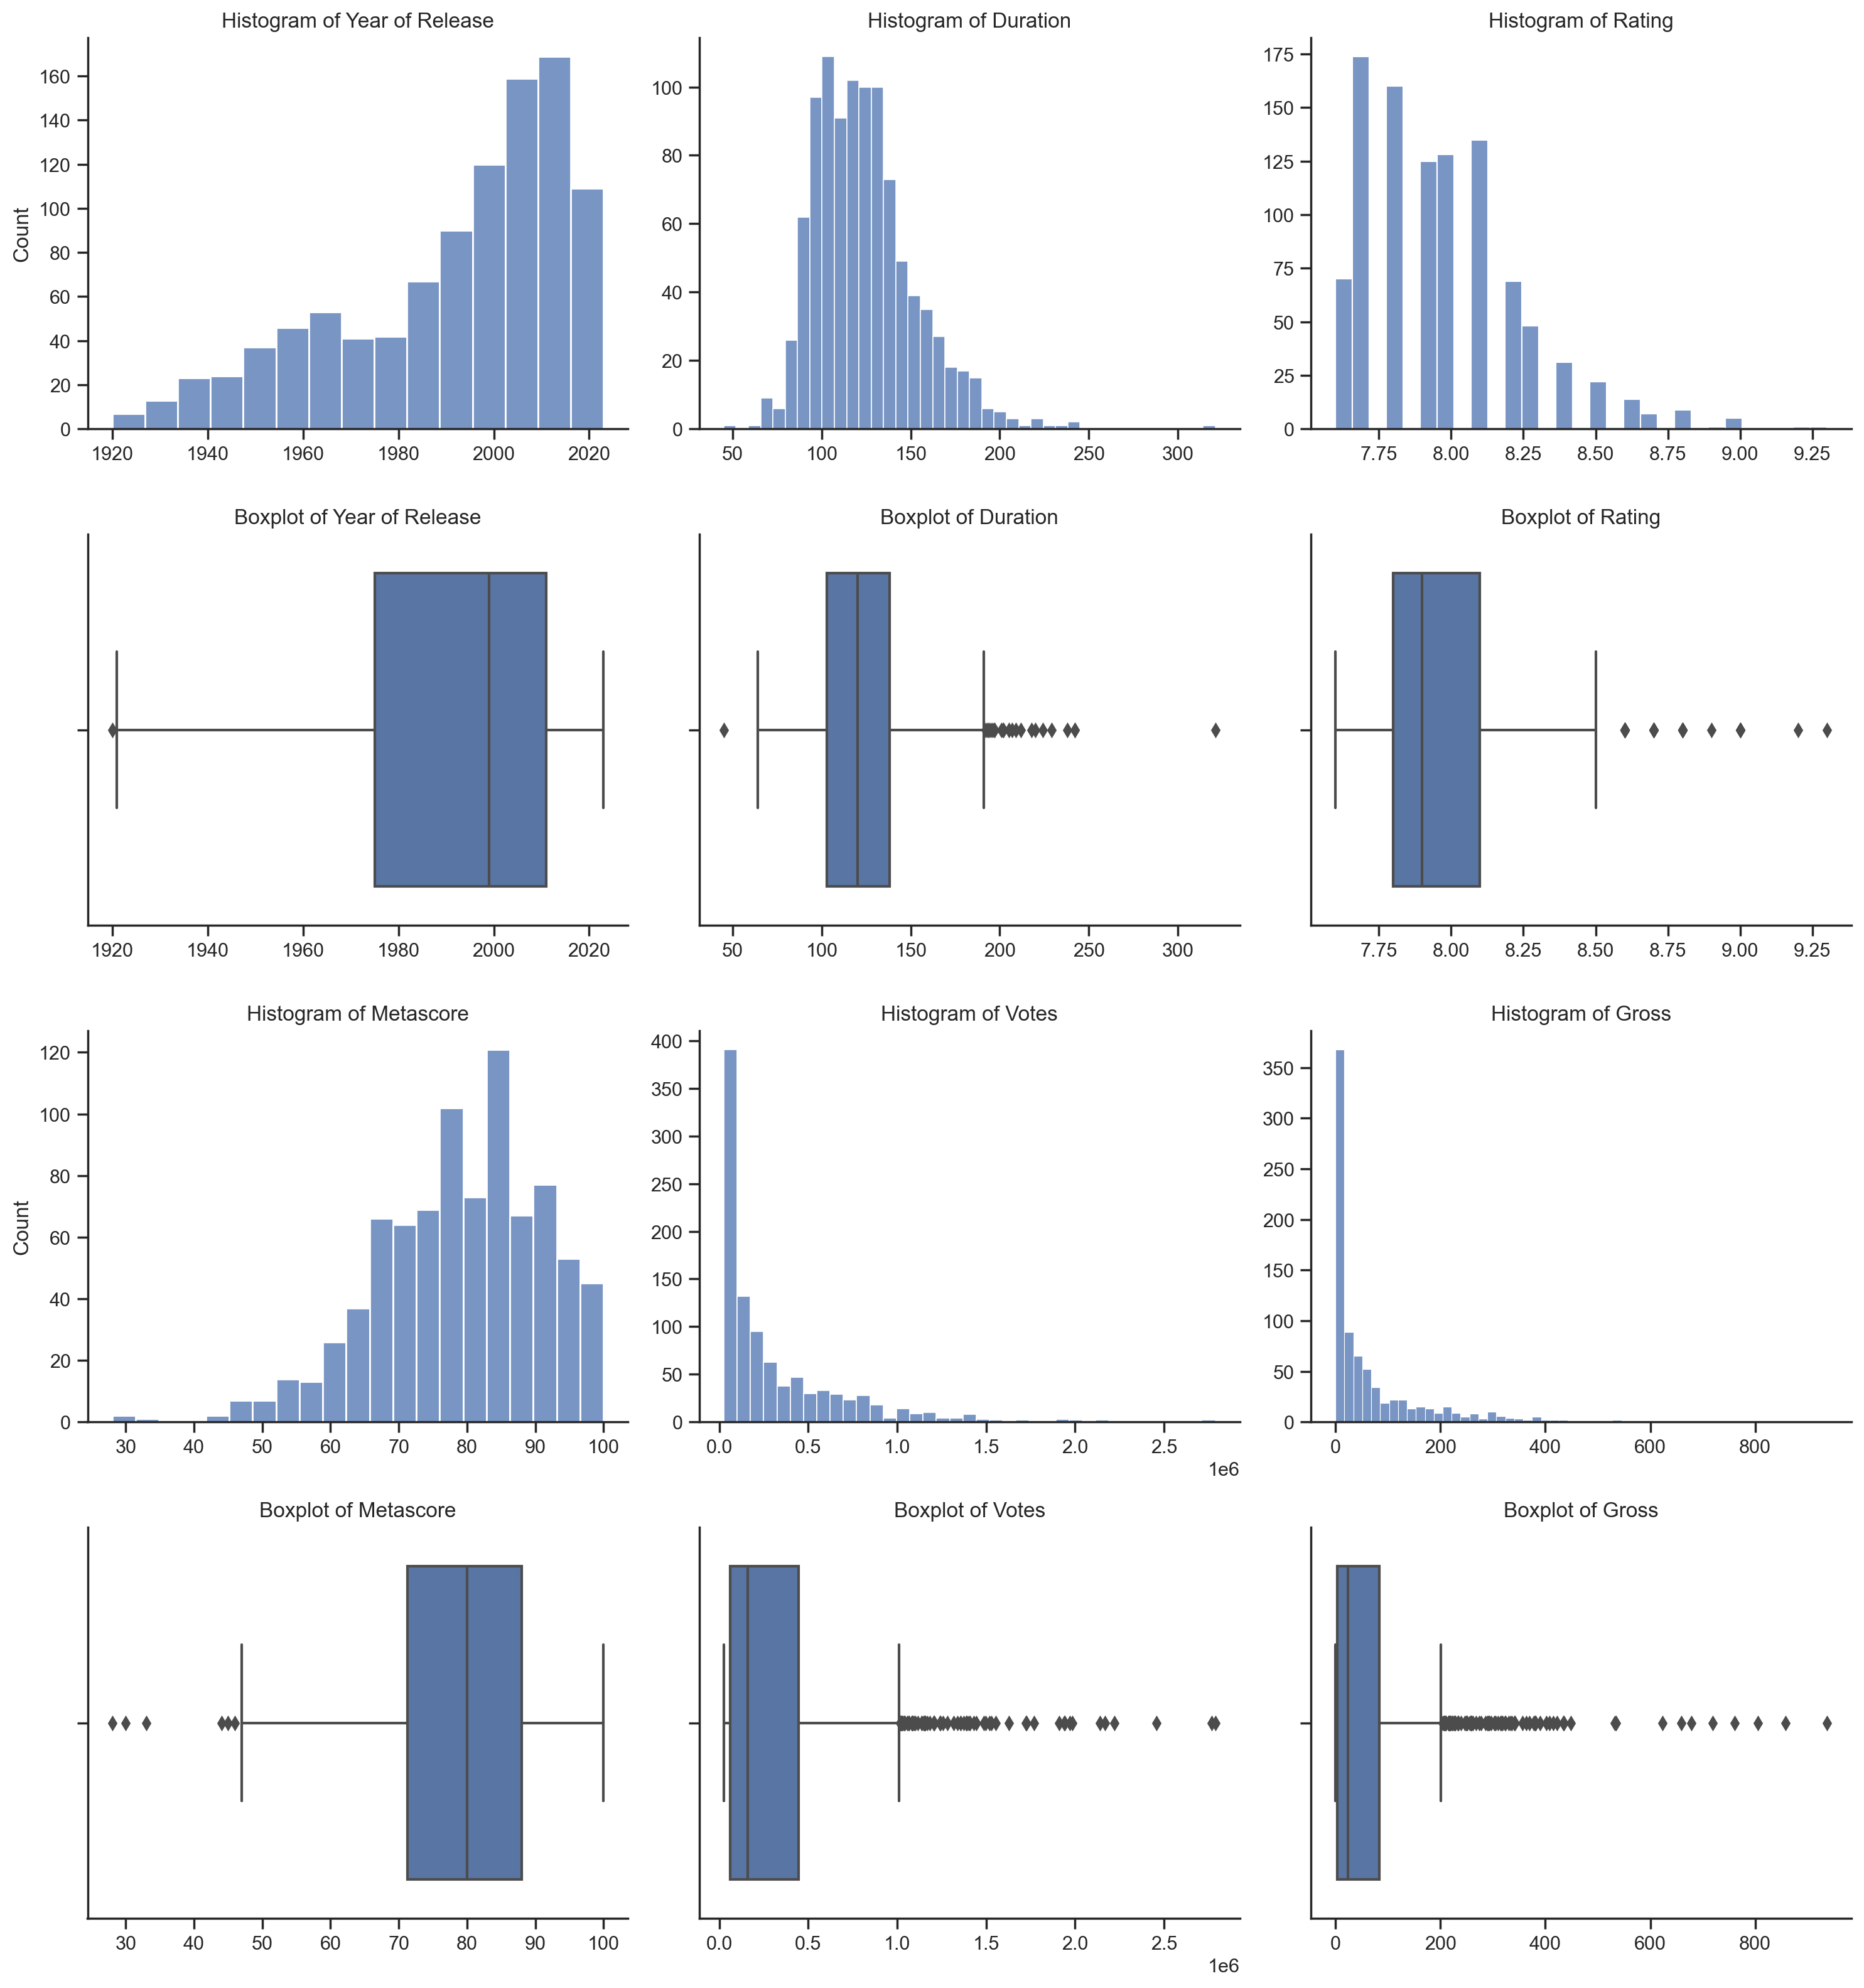

In [23]:
_, axes = plt.subplots(4, 3, figsize=(15, 16))

for i, col in enumerate(numeric_cols[:3]):
    sns.histplot(data=df, x=col, ax=axes[0, i])
    axes[0, i].set_xlabel('')
    axes[0, i].set_title(f'Histogram of {col}')
    sns.boxplot(data=df, x=col, ax=axes[1, i])
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Boxplot of {col}')
    if i >=1:
        axes[0, i].set_ylabel('')
for i, col in enumerate(numeric_cols[3:]):
    sns.histplot(data=df, x=col, ax=axes[2, i])
    axes[2, i].set_xlabel('')
    axes[2, i].set_title(f'Histogram of {col}')
    sns.boxplot(data=df, x=col, ax=axes[3, i])
    axes[3, i].set_xlabel('')
    axes[3, i].set_title(f'Boxplot of {col}')
    if i >=1:
        axes[2, i].set_ylabel('')
        
plt.tight_layout()

**Note:**

When examining the Histograms and Boxplots of each numerical variable, several insightful patterns emerge:

- **Year of Release:**
  The distribution of `Year of Release` appears left-skewed, suggesting that a majority of movies in the top 1000 IMDb list were produced from the 1980s onwards. Notably, the earliest movie on the list dates back to the 1920s, highlighting the historical breadth of the selection.

- **Duration:**
  The `Duration` variable's distribution is centered around the 100 to 130-minute range, indicating that most movies within the dataset have typical lengths. Outliers are evident both on the longer end (duration exceeding 200 minutes) and the shorter end (a single movie with a duration under 50 minutes).

- **Rating and Metascore:**
  While the Histogram of `Rating` is right-skewed, the `Metascore` distribution leans left. Despite this divergence in distribution shapes, both scores exhibit similar ranges. The interquartile range (IQR) of `Rating` falls between approximately 7.7 and 8.3, while for `Metascore`, the IQR spans around 70 to 90. An intriguing point is that, despite being the top 1000 IMDb movies, `Metascore` has some outliers with scores under 50, in contrast to `Rating`.

- **Votes and Gross:**
  The distributions of both `Votes` and `Gross` exhibit a right-skewed pattern, implying that the majority of movies received a substantial yet modest number of votes and generated moderate revenue. To be more specific, the average number of votes hovers around 150,000, while the average gross revenue stands at approximately \$23 million. The existence of numerous outliers in both categories emphasizes the significant influence exerted by a select few movies, which contributes to a marked increase in the overall vote count and gross revenue figures.

In [24]:
df[['Votes', 'Gross']].describe()

Votes       Gross
count  1.000000e+03  808.000000
mean   3.203577e+05   70.264319
std    3.885927e+05  115.415159
min    2.589400e+04    0.000000
25%    6.260075e+04    3.140000
50%    1.586355e+05   23.250000
75%    4.443552e+05   83.417500
max    2.787294e+06  936.660000

### 5.2. Categorical Variables Analysis
- Top Content Groups and Content Ratings
- Top Directors and Actors
- Top Genres

In [25]:
for col in object_cols:
    unique_values = df[col].unique()
    if len(unique_values) > 5:
        print(f"There are {len(unique_values)} unique values in column '{col}'.")
    else:
        print(f"There are {len(unique_values)} unique values in column '{col}': {unique_values}")


There are 994 unique values in column 'Movie Name'.
There are 17 unique values in column 'Content Rating'.
There are 193 unique values in column 'Genre'.
There are 1000 unique values in column 'Description'.
There are 582 unique values in column 'Director'.
There are 998 unique values in column 'Stars'.
There are 4 unique values in column 'Content': ['Adults' 'Teens/PG' 'All Ages' nan]


### `Movie Name`

First I want to know films with highest and lowest metrics in the list:

In [26]:
highest_rating_movie = df[df['Rating'] == df['Rating'].max()]['Movie Name'].values[0]
highest_rating_year = df[df['Rating'] == df['Rating'].max()]['Year of Release'].values[0]
print(f"Movie with the highest 'Rating': {highest_rating_movie}, made in {highest_rating_year}, with a Rating of {df['Rating'].max()}.")
print("---")
highest_metascore_movie = df[df['Metascore'] == df['Metascore'].max()]['Movie Name'].values[0]
highest_metascore_year = df[df['Metascore'] == df['Metascore'].max()]['Year of Release'].values[0]
print(f"Movie with the highest 'Metascore': {highest_metascore_movie}, made in {highest_metascore_year}, with a Metascore of {df['Metascore'].max()}.")
print("---")
highest_votes_movie = df[df['Votes'] == df['Votes'].max()]['Movie Name'].values[0]
highest_votes_year = df[df['Votes'] == df['Votes'].max()]['Year of Release'].values[0]
print(f"Movie with the highest 'Votes': {highest_votes_movie}, made in {highest_votes_year}, with {df['Votes'].max()/1e6:.2f} million Votes.")
print("---")
highest_gross_movie = df[df['Gross'] == df['Gross'].max()]['Movie Name'].values[0]
highest_gross_year = df[df['Gross'] == df['Gross'].max()]['Year of Release'].values[0]
print(f"Movie with the highest 'Gross': {highest_gross_movie}, made in {highest_gross_year}, with a Gross revenue of ${df['Gross'].max()}M.")
print("---")
longest_duration_movie = df[df['Duration'] == df['Duration'].max()]['Movie Name'].values[0]
longest_duration_year = df[df['Duration'] == df['Duration'].max()]['Year of Release'].values[0]
print(f"Movie with the longest 'Duration': {longest_duration_movie}, made in {longest_duration_year}, with a Duration of {df['Duration'].max()} minutes.")


Movie with the highest 'Rating': The Shawshank Redemption, made in 1994, with a Rating of 9.3.
---
Movie with the highest 'Metascore': The Godfather, made in 1972, with a Metascore of 100.0.
---
Movie with the highest 'Votes': The Shawshank Redemption, made in 1994, with 2.79 million Votes.
---
Movie with the highest 'Gross': Star Wars: Episode VII - The Force Awakens, made in 2015, with a Gross revenue of $936.66M.
---
Movie with the longest 'Duration': Gangs of Wasseypur, made in 2012, with a Duration of 321 minutes.


In [27]:
lowest_rating_movie = df[df['Rating'] == df['Rating'].min()]['Movie Name'].values[0]
lowest_rating_year = df[df['Rating'] == df['Rating'].min()]['Year of Release'].values[0]
print(f"Movie with the lowest 'Rating': {lowest_rating_movie}, made in {lowest_rating_year}, with a Rating of {df['Rating'].min()}.")
print("---")
lowest_metascore_movie = df[df['Metascore'] == df['Metascore'].min()]['Movie Name'].values[0]
lowest_metascore_year = df[df['Metascore'] == df['Metascore'].min()]['Year of Release'].values[0]
print(f"Movie with the lowest 'Metascore': {lowest_metascore_movie}, made in {lowest_metascore_year}, with a Metascore of {df['Metascore'].min()}.")
print("---")
lowest_votes_movie = df[df['Votes'] == df['Votes'].min()]['Movie Name'].values[0]
lowest_votes_year = df[df['Votes'] == df['Votes'].min()]['Year of Release'].values[0]
print(f"Movie with the lowest 'Votes': {lowest_votes_movie}, made in {lowest_votes_year}, with {df['Votes'].min()/1e6:.2f} million Votes.")
print("---")
lowest_gross_movie = df[df['Gross'] == df['Gross'].min()]['Movie Name'].values[0]
lowest_gross_year = df[df['Gross'] == df['Gross'].min()]['Year of Release'].values[0]
print(f"Movie with the lowest 'Gross': {lowest_gross_movie}, made in {lowest_gross_year}, with a Gross revenue of ${df['Gross'].min()}M.")
print("---")
shortest_duration_movie = df[df['Duration'] == df['Duration'].min()]['Movie Name'].values[0]
shortest_duration_year = df[df['Duration'] == df['Duration'].min()]['Year of Release'].values[0]
print(f"Movie with the shortest 'Duration': {shortest_duration_movie}, made in {shortest_duration_year}, with a Duration of {df['Duration'].min()} minutes.")

Movie with the lowest 'Rating': The Blind Side, made in 2009, with a Rating of 7.6.
---
Movie with the lowest 'Metascore': I Am Sam, made in 2001, with a Metascore of 28.0.
---
Movie with the lowest 'Votes': Marty, made in 1955, with 0.03 million Votes.
---
Movie with the lowest 'Gross': Knockin' on Heaven's Door, made in 1997, with a Gross revenue of $0.0M.
---
Movie with the shortest 'Duration': Sherlock Jr., made in 1924, with a Duration of 45 minutes.


Now let's check for duplicated movie names:

In [28]:
df[df['Movie Name'].duplicated(keep=False)].sort_values(by=['Movie Name','Year of Release'])

Movie Name  Year of Release Content Rating  \
283   All Quiet on the Western Front             1930         Passed   
612   All Quiet on the Western Front             2022              R   
588             Beauty and the Beast             1946      Not Rated   
378             Beauty and the Beast             1991              G   
138                         Drishyam             2013      Not Rated   
195                         Drishyam             2015      Not Rated   
90                        Drishyam 2             2021            NaN   
187                       Drishyam 2             2022      Not Rated   
908                         Scarface             1932             PG   
100                         Scarface             1983            18+   
672  The Girl with the Dragon Tattoo             2009              R   
617  The Girl with the Dragon Tattoo             2011              R   

     Duration                       Genre  Rating  Metascore  \
283       152                  Drama, War     8.1       91.0   
612       148          Action, Drama, War     7.8       76.0   
588        93     Drama, Fantasy, Romance     7.9       92.0   
378        84  Animation, Family, Fantasy     8.0       95.0   
138       160      Crime, Drama, Thriller     8.3        NaN   
195       163       Crime, Drama, Mystery     8.2        NaN   
90        152      Crime, Drama, Thriller     8.4        NaN   
187       140       Crime, Drama, Mystery     8.2        NaN   
908        93        Action, Crime, Drama     7.7       90.0   
100       170                Crime, Drama     8.3       65.0   
672       152       Crime, Drama, Mystery     7.8       76.0   
617       158       Crime, Drama, Mystery     7.8       71.0   

                                           Description  \
283  A German youth eagerly enters World War I, but...   
612  A young German soldier's terrifying experience...   
588  A beautiful young woman takes her father's pla...   
378  A prince cursed to spend his days as a hideous...   
138  A man goes to extreme lengths to save his fami...   
195  Desperate measures are taken by a man who trie...   
90   A gripping tale of an investigation and a fami...   
187  A gripping tale of an investigation and a fami...   
908  An ambitious and nearly insane violent gangste...   
100  In 1980 Miami, a determined Cuban immigrant ta...   
672  A journalist is aided by a young female hacker...   
617  Journalist Mikael Blomkvist is aided in his se...   

                           Director  \
283                 Lewis Milestone   
612                   Edward Berger   
588    Jean Cocteau, \nRené Clément   
378     Gary Trousdale, \nKirk Wise   
138                   Jeethu Joseph   
195                 Nishikant Kamat   
90                    Jeethu Joseph   
187                 Abhishek Pathak   
908  Howard Hawks, \nRichard Rosson   
100                  Brian De Palma   
672               Niels Arden Oplev   
617                   David Fincher   

                                                 Stars   Votes   Gross  \
283  ['Lew Ayres', 'Louis Wolheim', 'John Wray', 'A...   65985    3.27   
612  ['Felix Kammerer', 'Albrecht Schuch', 'Aaron H...  218740     NaN   
588  ['Jean Marais', 'Josette Day', 'Mila Parély', ...   27430    0.30   
378  ["Paige O'Hara", 'Robby Benson', 'Jesse Corti'...  468702  218.97   
138    ['Mohanlal', 'Meena', 'Asha Sharath', 'Ansiba']   42947     NaN   
195  ['Ajay Devgn', 'Shriya Saran', 'Tabu', 'Rajat ...   89968    0.74   
90      ['Mohanlal', 'Meena', 'Ansiba', 'Esther Anil']   39493     NaN   
187  ['Ajay Devgn', 'Akshaye Khanna', 'Tabu', 'Shri...   39523     NaN   
908  ['Paul Muni', 'Ann Dvorak', 'Karen Morley', 'O...   29354     NaN   
100  ['Al Pacino', 'Michelle Pfeiffer', 'Steven Bau...  880217   45.60   
672  ['Michael Nyqvist', 'Noomi Rapace', 'Ewa Fröli...  220487   10.10   
617  ['Daniel Craig', 'Rooney Mara', 'Christopher P...  479358  102.52   

      Content  
283  All Ages 

**Note:**

All movies with duplicate names have been remade or adapted multiple times:

- Some of the movies have had particularly long gaps between their original release and their remakes such as "All Quiet on the Western Front", "Beauty and the Beast" and "Scarface". For example, the first version of "All Quiet on the Western Front" was released in 1930, and the most recent remake was released in 2022. 

- The Swedish version of "The Girl with the Dragon Tattoo" was followed by an American adaptation just two years later. This suggests that there is a demand for these movies to be adapted to different cultures and audiences.

- Finally, the Indian movie series "Drishyam" is unique in that 4 names on the list, two for "Drishyam" and two for "Drishyam 2". After a search on the Internet, I have found that there are multiple versions of Drishyam movies including Malaysian version and Hindi version. This suggests that it is a particularly popular and well-received series.

### `Content Rating` and `Content`

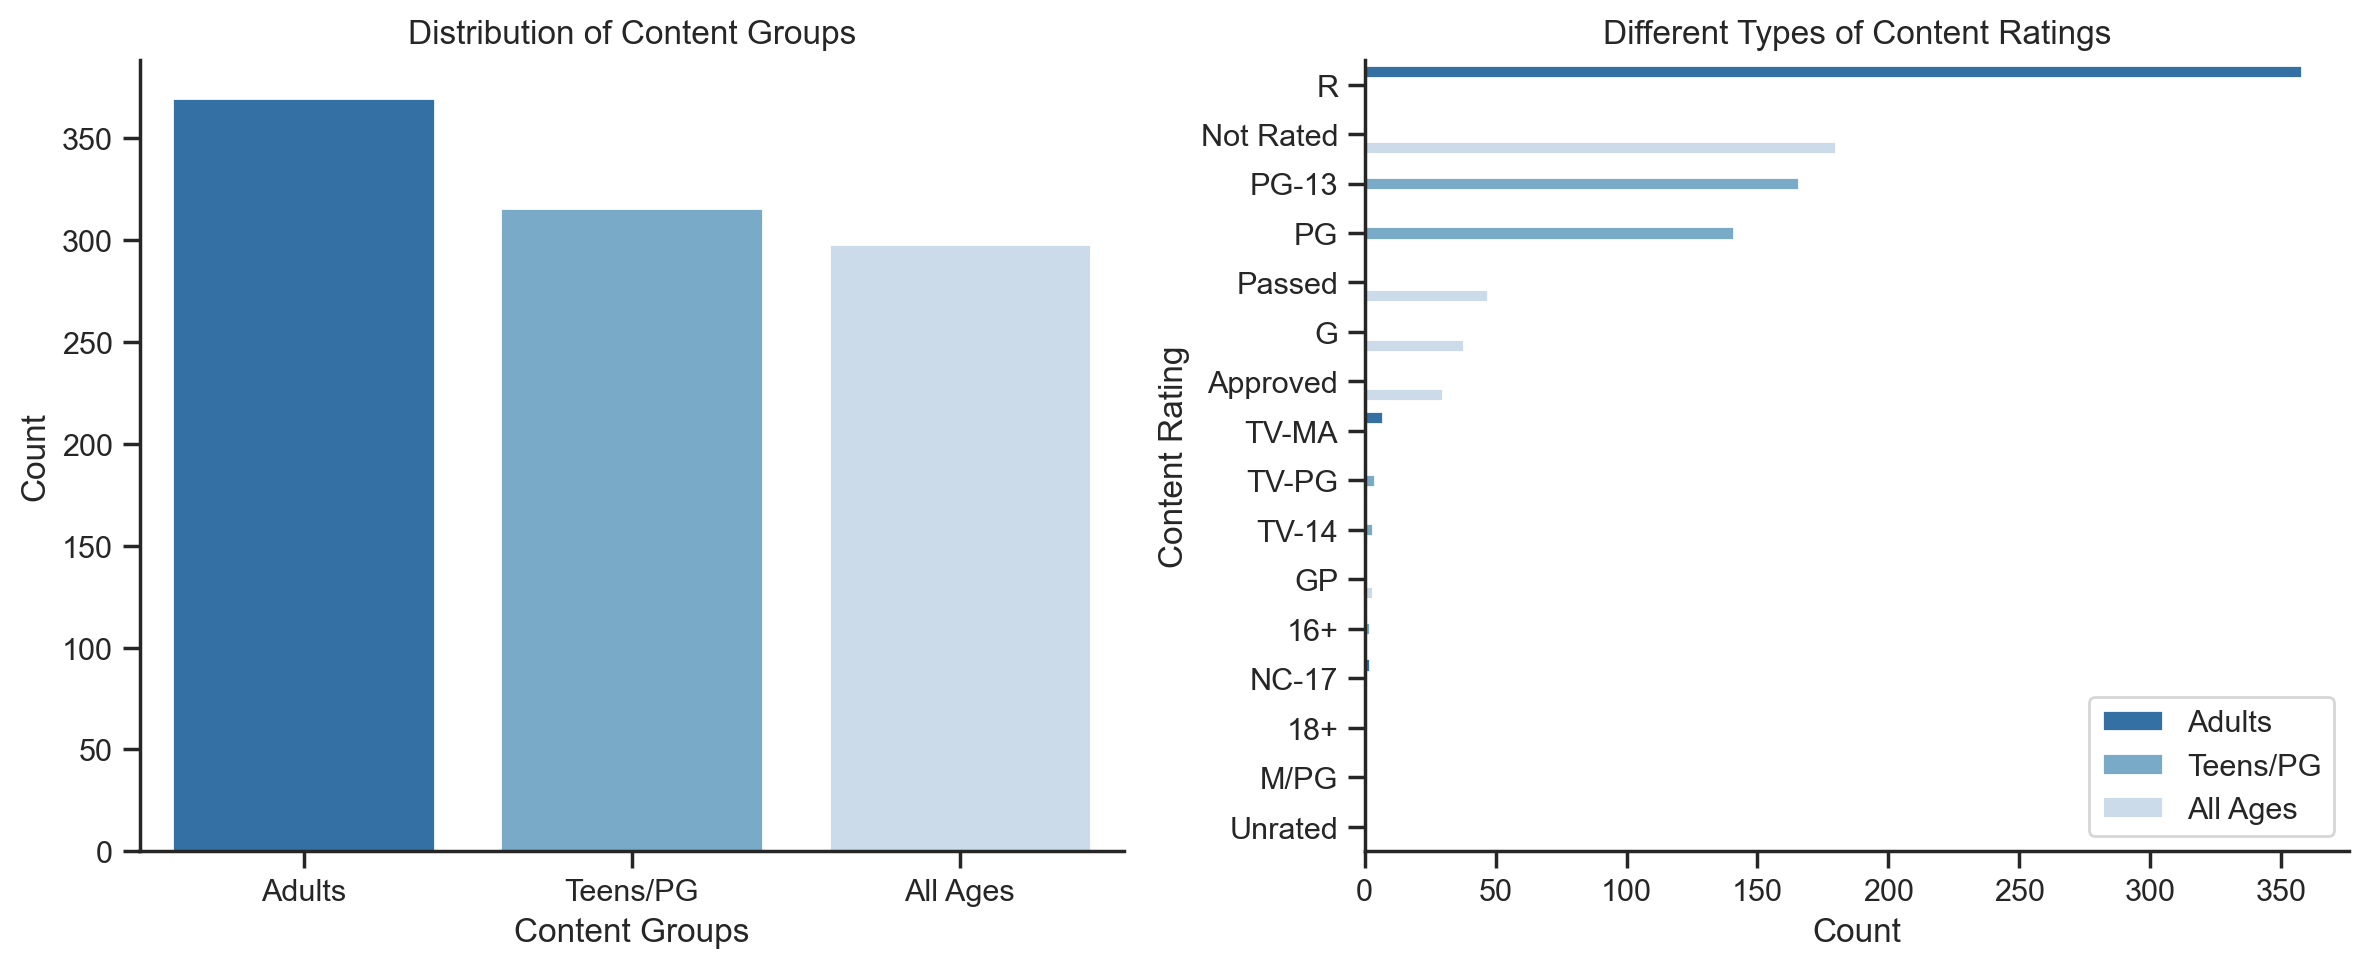

In [29]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='Content', palette='Blues_r', ax=axes[0])
axes[0].set_xlabel('Content Groups')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Content Groups')

sns.countplot(data=df, y='Content Rating', order=df['Content Rating'].value_counts().index, ax=axes[1], palette='Blues_r', hue='Content')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Content Rating')
axes[1].set_title('Different Types of Content Ratings')
axes[1].legend(loc='lower right')

plt.tight_layout();

**Note:**

Upon examining the content ratings of the movies in the dataset, several observations can be made:

- The majority of films, over 350 in number, are rated 'R', signifying content for **Adults**.
- The 'Not Rated' category follows with around 170 movies, indicating content suitable for **All Ages**.
- 'PG-13' and 'PG' occupy the third and fourth positions, each with approximately 150 movies, representing content for **Teens/PG**.
- The 'Passed', 'G', and 'Approved' categories are all part of the **All Ages** group, each with just under 50 movies.
- Other categories have significantly fewer movies, typically less than 10.

This analysis provides insight into the distribution of content ratings and their corresponding target audiences.

I have worked this out, now I want to check which type of genres having the most appearance:

### `Directors`

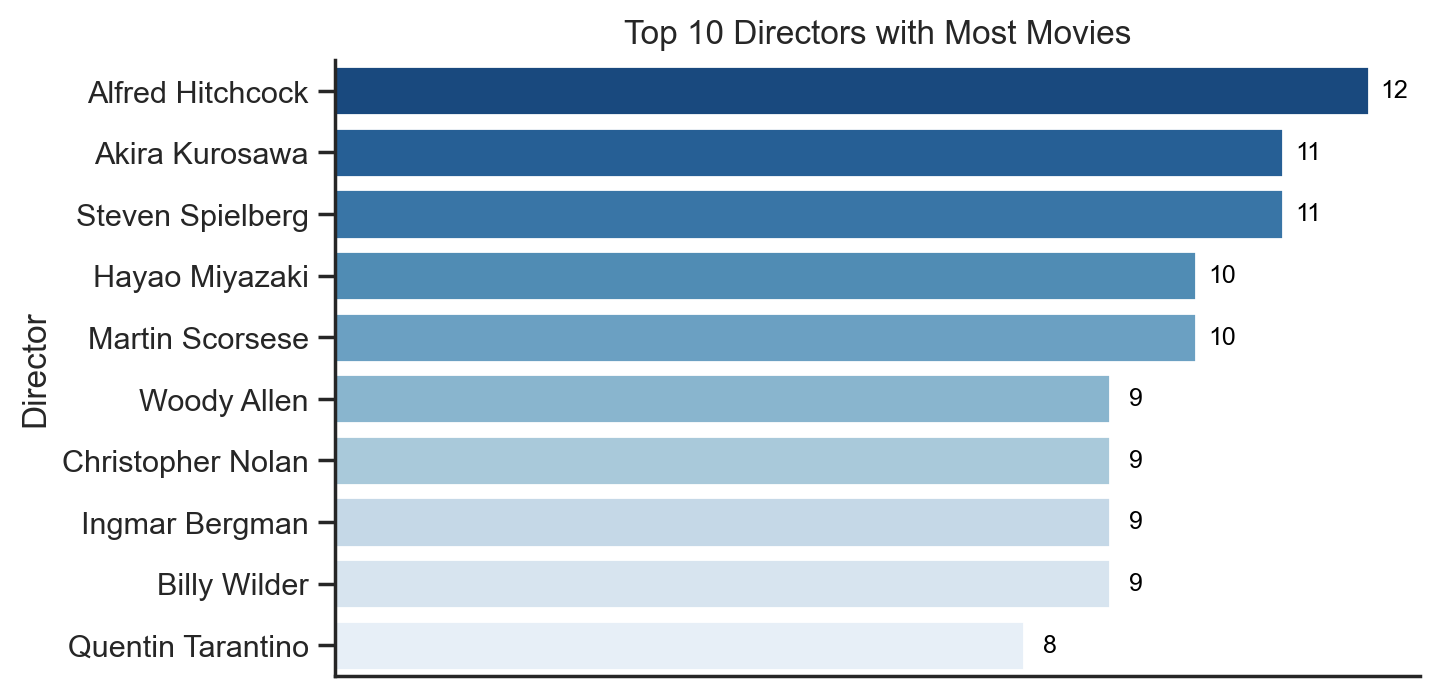

In [30]:
plt.figure(figsize=(7,4))

top_10_directors = df['Director'].value_counts().head(10)
sns.barplot(y=top_10_directors.index, x=top_10_directors.values, palette='Blues_r')

for i, v in enumerate(top_10_directors.values):
    plt.text(v + 0.3, i, str(v), ha='center', va='center', color='black', fontsize=9)

plt.ylabel('Director')
plt.title('Top 10 Directors with Most Movies')
plt.xticks([])
plt.show()


**Note:**

Top 20 directors with most movies among 1000 IMDB movies reveals a collection of renowned filmmakers who have made significant contributions to the world of cinema. 

Alfred Hitchcoc lead the list with 12 movies, followed by Akira Kurosawa and Steven Spielberg with 11 films each respectively. Other directors such as Martin Scorsese, Hayao Miyazaki share the same number of 10 movies to their name. it's surprised that there's two Japanese name on the list.

It's also notable that iconic figures like Woody Allen, Christopher Nolan, Ingmar Bergman, and Billy Wilder have left their mark with 9 movies each.

Now I will deep dive into the contribution of those directors:

In [31]:
top_10_directors_list = top_10_directors.index.to_list()

director_results_df = pd.DataFrame(columns=['Top 10 Director', 'Year of Release', 'Duration', 'Rating', 'Metascore', 'Votes', 'Gross'])

for name in top_10_directors_list:
    director_data = df[df['Director'] == name][['Year of Release', 'Duration', 'Rating', 'Metascore', 'Votes', 'Gross']].mean().to_frame().T.round(1)
    director_data['Top 10 Director'] = name  
    director_results_df = pd.concat([director_results_df, director_data], ignore_index=True)

director_results_df

Top 10 Director  Year of Release  Duration  Rating  Metascore      Votes  \
0   Alfred Hitchcock           1951.2     110.5     8.1       91.6   249578.2   
1     Akira Kurosawa           1963.4     135.4     8.2       92.6   102501.4   
2   Steven Spielberg           1989.7     142.3     8.1       79.8   779117.9   
3     Hayao Miyazaki           1996.2     113.0     8.0       84.1   284663.5   
4    Martin Scorsese           1995.6     145.0     8.1       82.9   785760.7   
5        Woody Allen           1987.8      96.0     7.8       82.4   149904.3   
6  Christopher Nolan           2010.6     144.7     8.5       79.0  1582150.6   
7     Ingmar Bergman           1966.2     100.9     8.1       89.2    72364.7   
8       Billy Wilder           1952.6     113.8     8.1       85.6   132423.3   
9  Quentin Tarantino           2006.0     143.5     8.2       78.6  1212806.9   

   Gross  
0   13.2  
1    1.1  
2  206.7  
3    5.6  
4   53.8  
5   30.7  
6  242.2  
7    2.7  
8   11.8  
9   90.9

**Note:**

- The correlation between film `Year of Release`  and `Gross` earnings suggests that more recent films tend to generate higher gross earnings. Additionally, there is a strong positive correlation between gross earnings and the number of votes a movie receives. Notably, **Akira Kurosawa** shares the second spot with **Steven Spielberg** in terms of average gross earnings, despite having an average gross of only 1.1 million dollars. This indicates that directors from less film-popular countries like **Japan (Akira Kurosawa and Hayao Miyazaki)** and **Sweden (Ingmar Bergman)** can produce high-quality films that might receive less attention and revenue.

- **Woody Allen**'s films stand out with an average duration of 96 minutes, and a relatively lower average rating compared to the other top 10 directors. On the other hand, **Christopher Nolan**, **Martin Scorsese**, and **Steven Spielberg** have longer average durations above 140 minutes, yet they enjoy higher average ratings. This suggests a potential correlation between film `Duratio`n and its `Rating`, warranting further investigation.

- It's also worth noting that **Alfred Hitchcock**, **Akira Kurosawa**, and **Ingmar Bergman** primarily directed movies in the mid-20th century, while other directors like Christopher Nolan and Quentin Tarantino are more active in the 21st century. This might contribute to differences in their film styles, themes, and their impact on the audience.




### `Stars`

In [32]:
df['Stars'].head()

0    ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...
1    ['Marlon Brando', 'Al Pacino', 'James Caan', '...
2    ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...
3    ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...
4    ['Al Pacino', 'Robert De Niro', 'Robert Duvall...
Name: Stars, dtype: object

I will check number of stars in each movie using `ast` library, which stands for "Abstract Syntax Trees." The `ast` module provides a way to parse and work with Python code as abstract syntax trees, which can be useful for evaluating and manipulating Python expressions.

In [33]:
df['Stars'] = df['Stars'].apply(ast.literal_eval)

# Create a new column to store the total number of stars for each movie
df['Number of Stars'] = df['Stars'].apply(len)

In [34]:
df['Number of Stars'].value_counts()

4    1000
Name: Number of Stars, dtype: int64

In [35]:
for i in df.index:
    df.at[i, 'Star_1'] = df['Stars'][i][0]
    df.at[i, 'Star_2'] = df['Stars'][i][1]
    df.at[i, 'Star_3'] = df['Stars'][i][2]
    df.at[i, 'Star_4'] = df['Stars'][i][3]

In [36]:
df[['Stars', 'Star_1', 'Star_2', 'Star_3', 'Star_4']].head()

Stars          Star_1  \
0  [Tim Robbins, Morgan Freeman, Bob Gunton, Will...     Tim Robbins   
1  [Marlon Brando, Al Pacino, James Caan, Diane K...   Marlon Brando   
2  [Christian Bale, Heath Ledger, Aaron Eckhart, ...  Christian Bale   
3  [Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...     Liam Neeson   
4  [Al Pacino, Robert De Niro, Robert Duvall, Dia...       Al Pacino   

           Star_2         Star_3            Star_4  
0  Morgan Freeman     Bob Gunton    William Sadler  
1       Al Pacino     James Caan      Diane Keaton  
2    Heath Ledger  Aaron Eckhart     Michael Caine  
3   Ralph Fiennes   Ben Kingsley  Caroline Goodall  
4  Robert De Niro  Robert Duvall      Diane Keaton

In [37]:
df = df.drop(columns=['Stars', 'Number of Stars'])

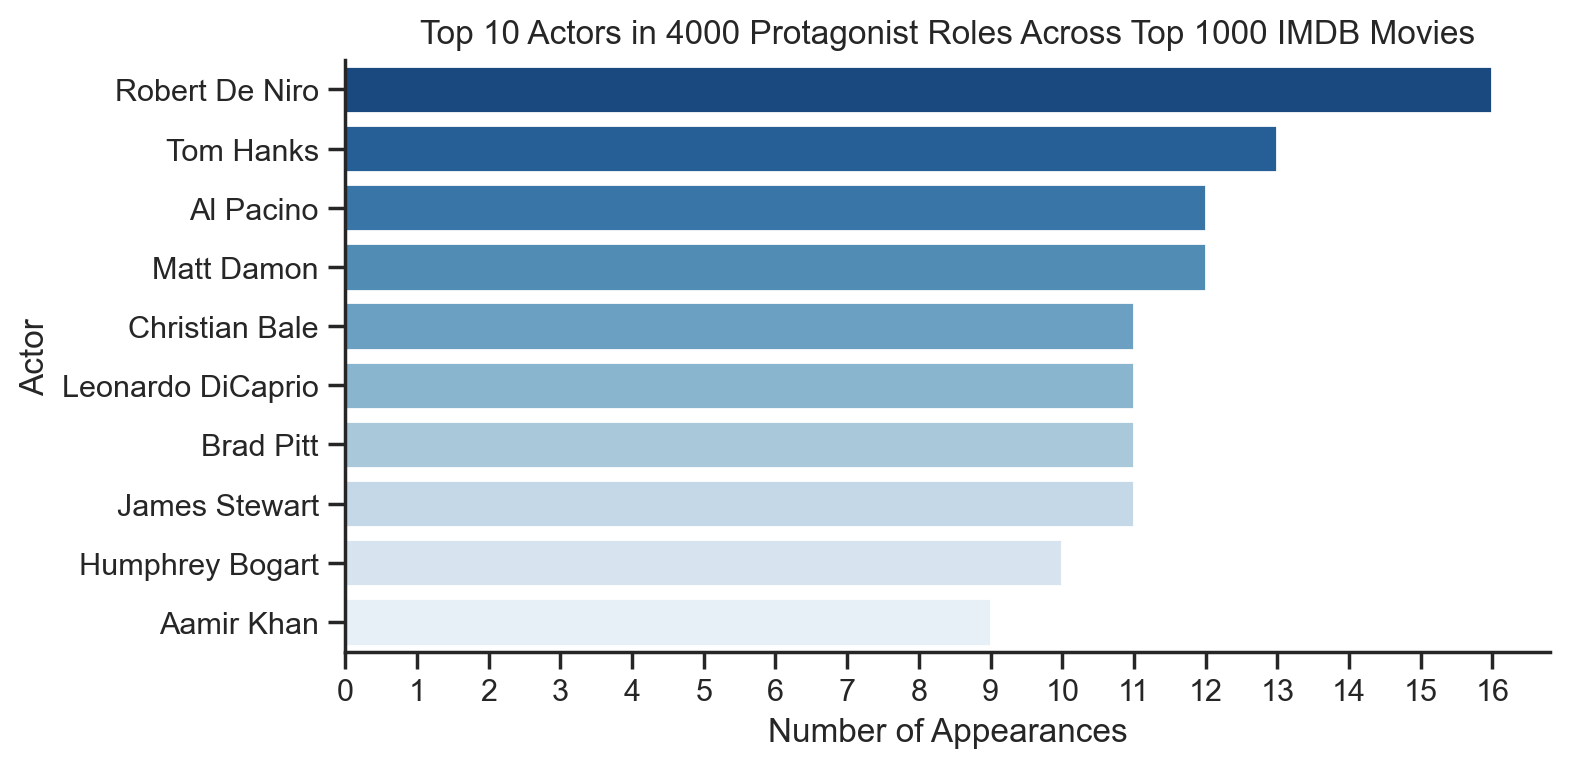

In [38]:
all_stars = df['Star_1'].tolist() + df['Star_2'].tolist() + df['Star_3'].tolist() + df['Star_4'].tolist()
top_10_stars = pd.Series(all_stars).value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(y=top_10_stars.index, x=top_10_stars.values, palette='Blues_r')
plt.xticks(range(0, 17, 1)) 
plt.ylabel('Actor')
plt.xlabel('Number of Appearances')
plt.title(f'Top 10 Actors in {len(all_stars)} Protagonist Roles Across Top 1000 IMDB Movies')
plt.tight_layout();

**Note:** 

The list spotlights the top 10 actors with the highest frequency of appearances among 4000 protagonist roles across the top 1000 IMDb movies. Notably, Robert De Niro shines with an impressive 16 appearances. Tom Hanks follows closely with a notable count of 13 appearances.

Sharing the spotlight are Al Pacino and Matt Damon, each leaving a significant mark with 12 appearances. The list further showcases the consistently exceptional careers of Christian Bale, Leonardo DiCaprio, Brad Pitt, and James Stewart, all boasting 11 appearances.

It's particularly intriguing to observe the international resonance of this list, as Aamir Khan, an accomplished Indian actor, earns attention with a commendable 9 appearances.

In [39]:
top_10_stars_list = top_10_stars.index.to_list()

star_averages_list = []

for name in top_10_stars_list:
    star_df = df[(df['Star_4'] == name) | 
                 (df['Star_3'] == name) | 
                 (df['Star_2'] == name) | 
                 (df['Star_1'] == name)][['Year of Release', 'Duration', 'Rating', 'Metascore', 'Votes', 'Gross']]
    
    star_averages = star_df.mean().to_frame().T.round(1)
    star_averages.insert(0, 'Top 10 Stars', name)
    
    star_averages_list.append(star_averages)

stars_summary = pd.concat(star_averages_list, ignore_index=True)
stars_summary

Top 10 Stars  Year of Release  Duration  Rating  Metascore      Votes  \
0     Robert De Niro           1991.2     150.3     8.1       81.2   574744.0   
1          Tom Hanks           2001.5     128.9     8.1       79.9   823862.2   
2          Al Pacino           1988.7     155.4     8.1       80.1   565620.6   
3         Matt Damon           2007.5     132.6     8.0       80.1   693448.8   
4     Christian Bale           2006.6     132.9     8.0       72.9   932189.5   
5  Leonardo DiCaprio           2007.5     154.1     8.1       74.9  1189019.3   
6          Brad Pitt           2005.9     135.5     8.0       74.6   970647.5   
7      James Stewart           1948.5     118.5     8.1       90.7   182592.1   
8    Humphrey Bogart           1947.7     107.8     7.9       87.1   126404.0   
9         Aamir Khan           2005.2     173.0     8.2       75.5   156289.8   

   Gross  
0   59.5  
1  217.8  
2   47.9  
3  157.1  
4  146.9  
5  186.3  
6   91.0  
7   11.1  
8    6.2  
9    4.8

**Note:**

- Among the top 10 stars, there is a wide range of average release years, anh most of the stars are in 21st century.

- James Stewart and Humphrey Bogart have relatively shorter average film durations compared to the other stars, while Aamir Khan has the longest average film duration.

- While the average `Ratings` are relatively consistent among the top stars, some stars's films tend to have a slightly lower average Metascore around 70-80.

- Robert De Niro, Tom Hanks, and Leonardo DiCaprio have notably high average vote counts, indicating a strong fan base and popularity.

- Gross earnings vary across the stars, with Tom Hanks and Leonardo DiCaprio having the highest average gross earnings.

- Humphrey Bogart's films, with an average release year around 1947, tend to have lower gross earnings. This can be attributed to the fact that these films were produced in an era when the movie industry and its revenue model were quite different from today.

- Aamir Khan's films, also, have lower average gross earnings compared to other Hollywood films in this list. This could be due to the fact that his films, while extremely popular within India and other regions, may not have as extensive a reach in terms of international box office numbers. Aamir Khan's movies are likely catering to a large and dedicated Indian audience, which contributes to high viewership and cultural impact, but might not necessarily translate to the same level of global box office revenue typically associated with Hollywood blockbuster films.

### `Genre`

In [40]:
df['Genre'].value_counts().to_frame().head(10)

Genre
Drama                            92
Drama, Romance                   39
Comedy, Drama                    34
Comedy, Drama, Romance           32
Crime, Drama, Thriller           29
Crime, Drama, Mystery            29
Animation, Adventure, Comedy     29
Action, Crime, Drama             29
Biography, Drama, History        27
Crime, Drama                     23

**Note:**

I notice that the `Genre` column contains multiple genres for each movie entry, sometimes leading to duplicate values and potentially obscuring meaningful insights. I need to work on this:

In [41]:
unique_genres = set()
for genres in df['Genre']:
    unique_genres.update(genres.split(', '))

unique_genres_list = sorted(list(unique_genres))
print(f"There are {len(unique_genres_list)} unique genres among 'Genre' column.\n\n{unique_genres_list}")

There are 21 unique genres among 'Genre' column.

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [42]:
for genre in unique_genres_list:
    df[genre] = np.where(df['Genre'].str.contains(genre), 1, 0)

In [43]:
pd.set_option('display.max_columns', None)
df.loc[:, 'Action':]

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0         0          0          0          0       0      0      1       0   
1         0          0          0          0       0      1      1       0   
2         1          0          0          0       0      1      1       0   
3         0          0          0          1       0      0      1       0   
4         0          0          0          0       0      1      1       0   
..      ...        ...        ...        ...     ...    ...    ...     ...   
995       0          0          0          1       1      0      1       0   
996       0          0          0          0       0      0      1       0   
997       0          0          0          1       0      0      1       0   
998       0          0          0          0       0      0      0       0   
999       1          0          0          0       0      1      1       0   

     Fantasy  Film-Noir  History  Horror  Music  Musical  Mystery  Romance  \
0          0          0        0       0      0        0        0        0   
1          0          0        0       0      0        0        0        0   
2          0          0        0       0      0        0        0        0   
3          0          0        1       0      0        0        0        0   
4          0          0        0       0      0        0        0        0   
..       ...        ...      ...     ...    ...      ...      ...      ...   
995        0          0        0       0      0        0        0        0   
996        0          0        0       0      0        0        1        1   
997        0          0        0       0      1        0        0        0   
998        0          0        0       1      0        0        0        0   
999        0          0        0       0      0        0        0        0   

     Sci-Fi  Sport  Thriller  War  Western  
0         0      0         0    0        0  
1         0      0         0    0        0  
2         0      0         0    0        0  
3         0      0         0    0        0  
4         0      0         0    0        0  
..      ...    ...       ...  ...      ...  
995       0      0         0    0        0  
996       0      0         0    0        0  
997       0      0         0    0        0  
998       1      0         0    0        0  
999       0      0         0    0        0  

[1000 rows x 21 columns]

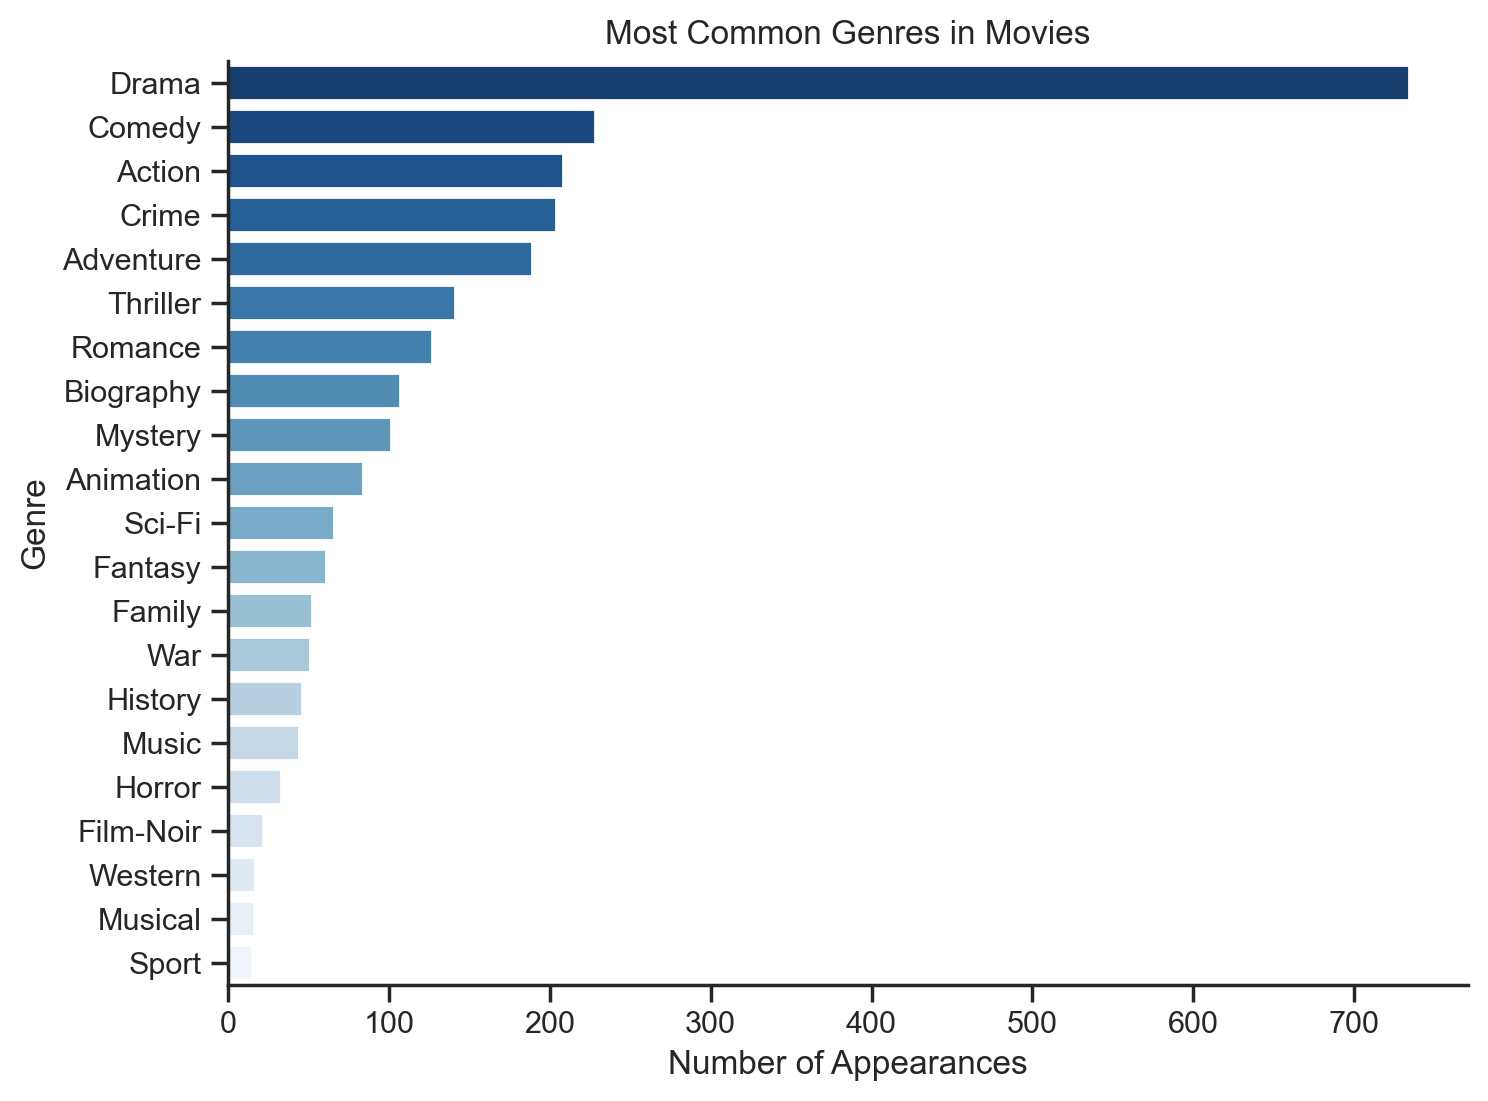

In [44]:
plt.figure(figsize=(8,6))
genre_count = df.loc[:, 'Action':].sum().sort_values(ascending=False)
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Blues_r')
plt.title('Most Common Genres in Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Genre');

**Note:**

Among the top 1000 IMDB movies, the most prevalent genre is 'Drama', accounting for over 700 movies. Following are 'Comedy', 'Action', 'Crime', and 'Adventure', each with approximately 200 appearances.

Conversely, 'Sports', 'Musical', and 'Western' are the least common genres, each appearing in only around 15 movies. The other genres fall within a range of 100 to 200 appearances.

This distribution reflects the dominant influence of 'Drama' in the selection, followed by a mix of popular genres.

### 5.3. Correlation Analysis

First, let's check the Pearson correlation between variables:

In [45]:
df.head()

Movie Name  Year of Release Content Rating  Duration  \
0  The Shawshank Redemption             1994              R       142   
1             The Godfather             1972              R       175   
2           The Dark Knight             2008          PG-13       152   
3          Schindler's List             1993              R       195   
4     The Godfather Part II             1974              R       202   

                       Genre  Rating  Metascore  \
0                      Drama     9.3       82.0   
1               Crime, Drama     9.2      100.0   
2       Action, Crime, Drama     9.0       84.0   
3  Biography, Drama, History     9.0       95.0   
4               Crime, Drama     9.0       90.0   

                                         Description              Director  \
0  Over the course of several years, two convicts...        Frank Darabont   
1  Don Vito Corleone, head of a mafia family, dec...  Francis Ford Coppola   
2  When the menace known as the Joker wreaks havo...     Christopher Nolan   
3  In German-occupied Poland during World War II,...      Steven Spielberg   
4  The early life and career of Vito Corleone in ...  Francis Ford Coppola   

     Votes   Gross   Content          Star_1          Star_2         Star_3  \
0  2787294   28.34    Adults     Tim Robbins  Morgan Freeman     Bob Gunton   
1  1940977  134.97    Adults   Marlon Brando       Al Pacino     James Caan   
2  2766703  534.86  Teens/PG  Christian Bale    Heath Ledger  Aaron Eckhart   
3  1402134   96.90    Adults     Liam Neeson   Ralph Fiennes   Ben Kingsley   
4  1318961   57.30    Adults       Al Pacino  Robert De Niro  Robert Duvall   

             Star_4  Action  Adventure  Animation  Biography  Comedy  Crime  \
0    William Sadler       0          0          0          0       0      0   
1      Diane Keaton       0          0          0          0       0      1   
2     Michael Caine       1          0          0          0       0      1   
3  Caroline Goodall       0          0          0          1       0      0   
4      Diane Keaton       0          0          0          0       0      1   

   Drama  Family  Fantasy  Film-Noir  History  Horror  Music  Musical  \
0      1       0        0          0        0       0      0        0   
1      1       0        0          0        0       0      0        0   
2      1       0        0          0        0       0      0        0   
3      1       0        0          0        1       0      0        0   
4      1       0        0          0        0       0      0        0   

   Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0        0       0      0         0    0        0  
1        0        0       0      0         0    0        0  
2        0        0       0      0         0    0        0  
3        0        0       0      0         0    0        0  
4        0        0       0      0         0    0        0

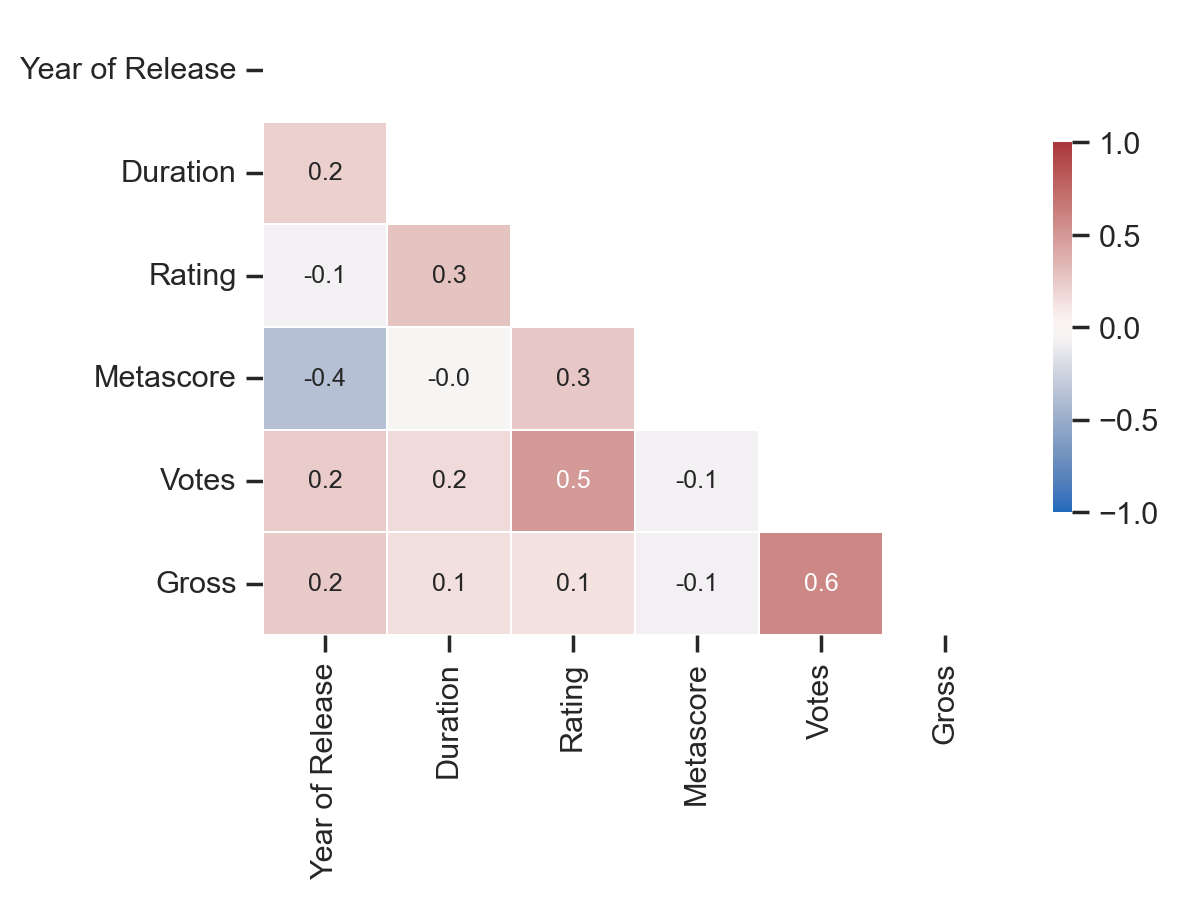

In [46]:
corr = df.loc[:,'Movie Name':'Content'].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, 
            mask=np.triu(corr), 
            annot=True, annot_kws={'size':9}, 
            linecolor='w', linewidth=0.1, 
            fmt='.1f', 
            cbar_kws={'shrink':0.6}, 
            vmin=-1, vmax=1, center=0, 
            cmap='vlag');

**Note:**

After a thorough analysis of the heatmap, a clear correlation emerges between several pairs of variables.
- Notably, the correlation coefficient of 0.5 between `Votes` and `Rating` emphasizes a substantial and positive connection between these two aspects.
- Additionally, a significant correlation is noticeable between `Gross` and `Votes`, as evidenced by a correlation coefficient of 0.6.
- On a different note, the `Year of Release` exhibits a negative correlation of -0.4 with `Metascore`. This suggests that more contemporary films tend to receive comparatively lower Metascores, implying a trend of decreasing critical reception over time.

I will plot pairplot to see the relationship more clearly:

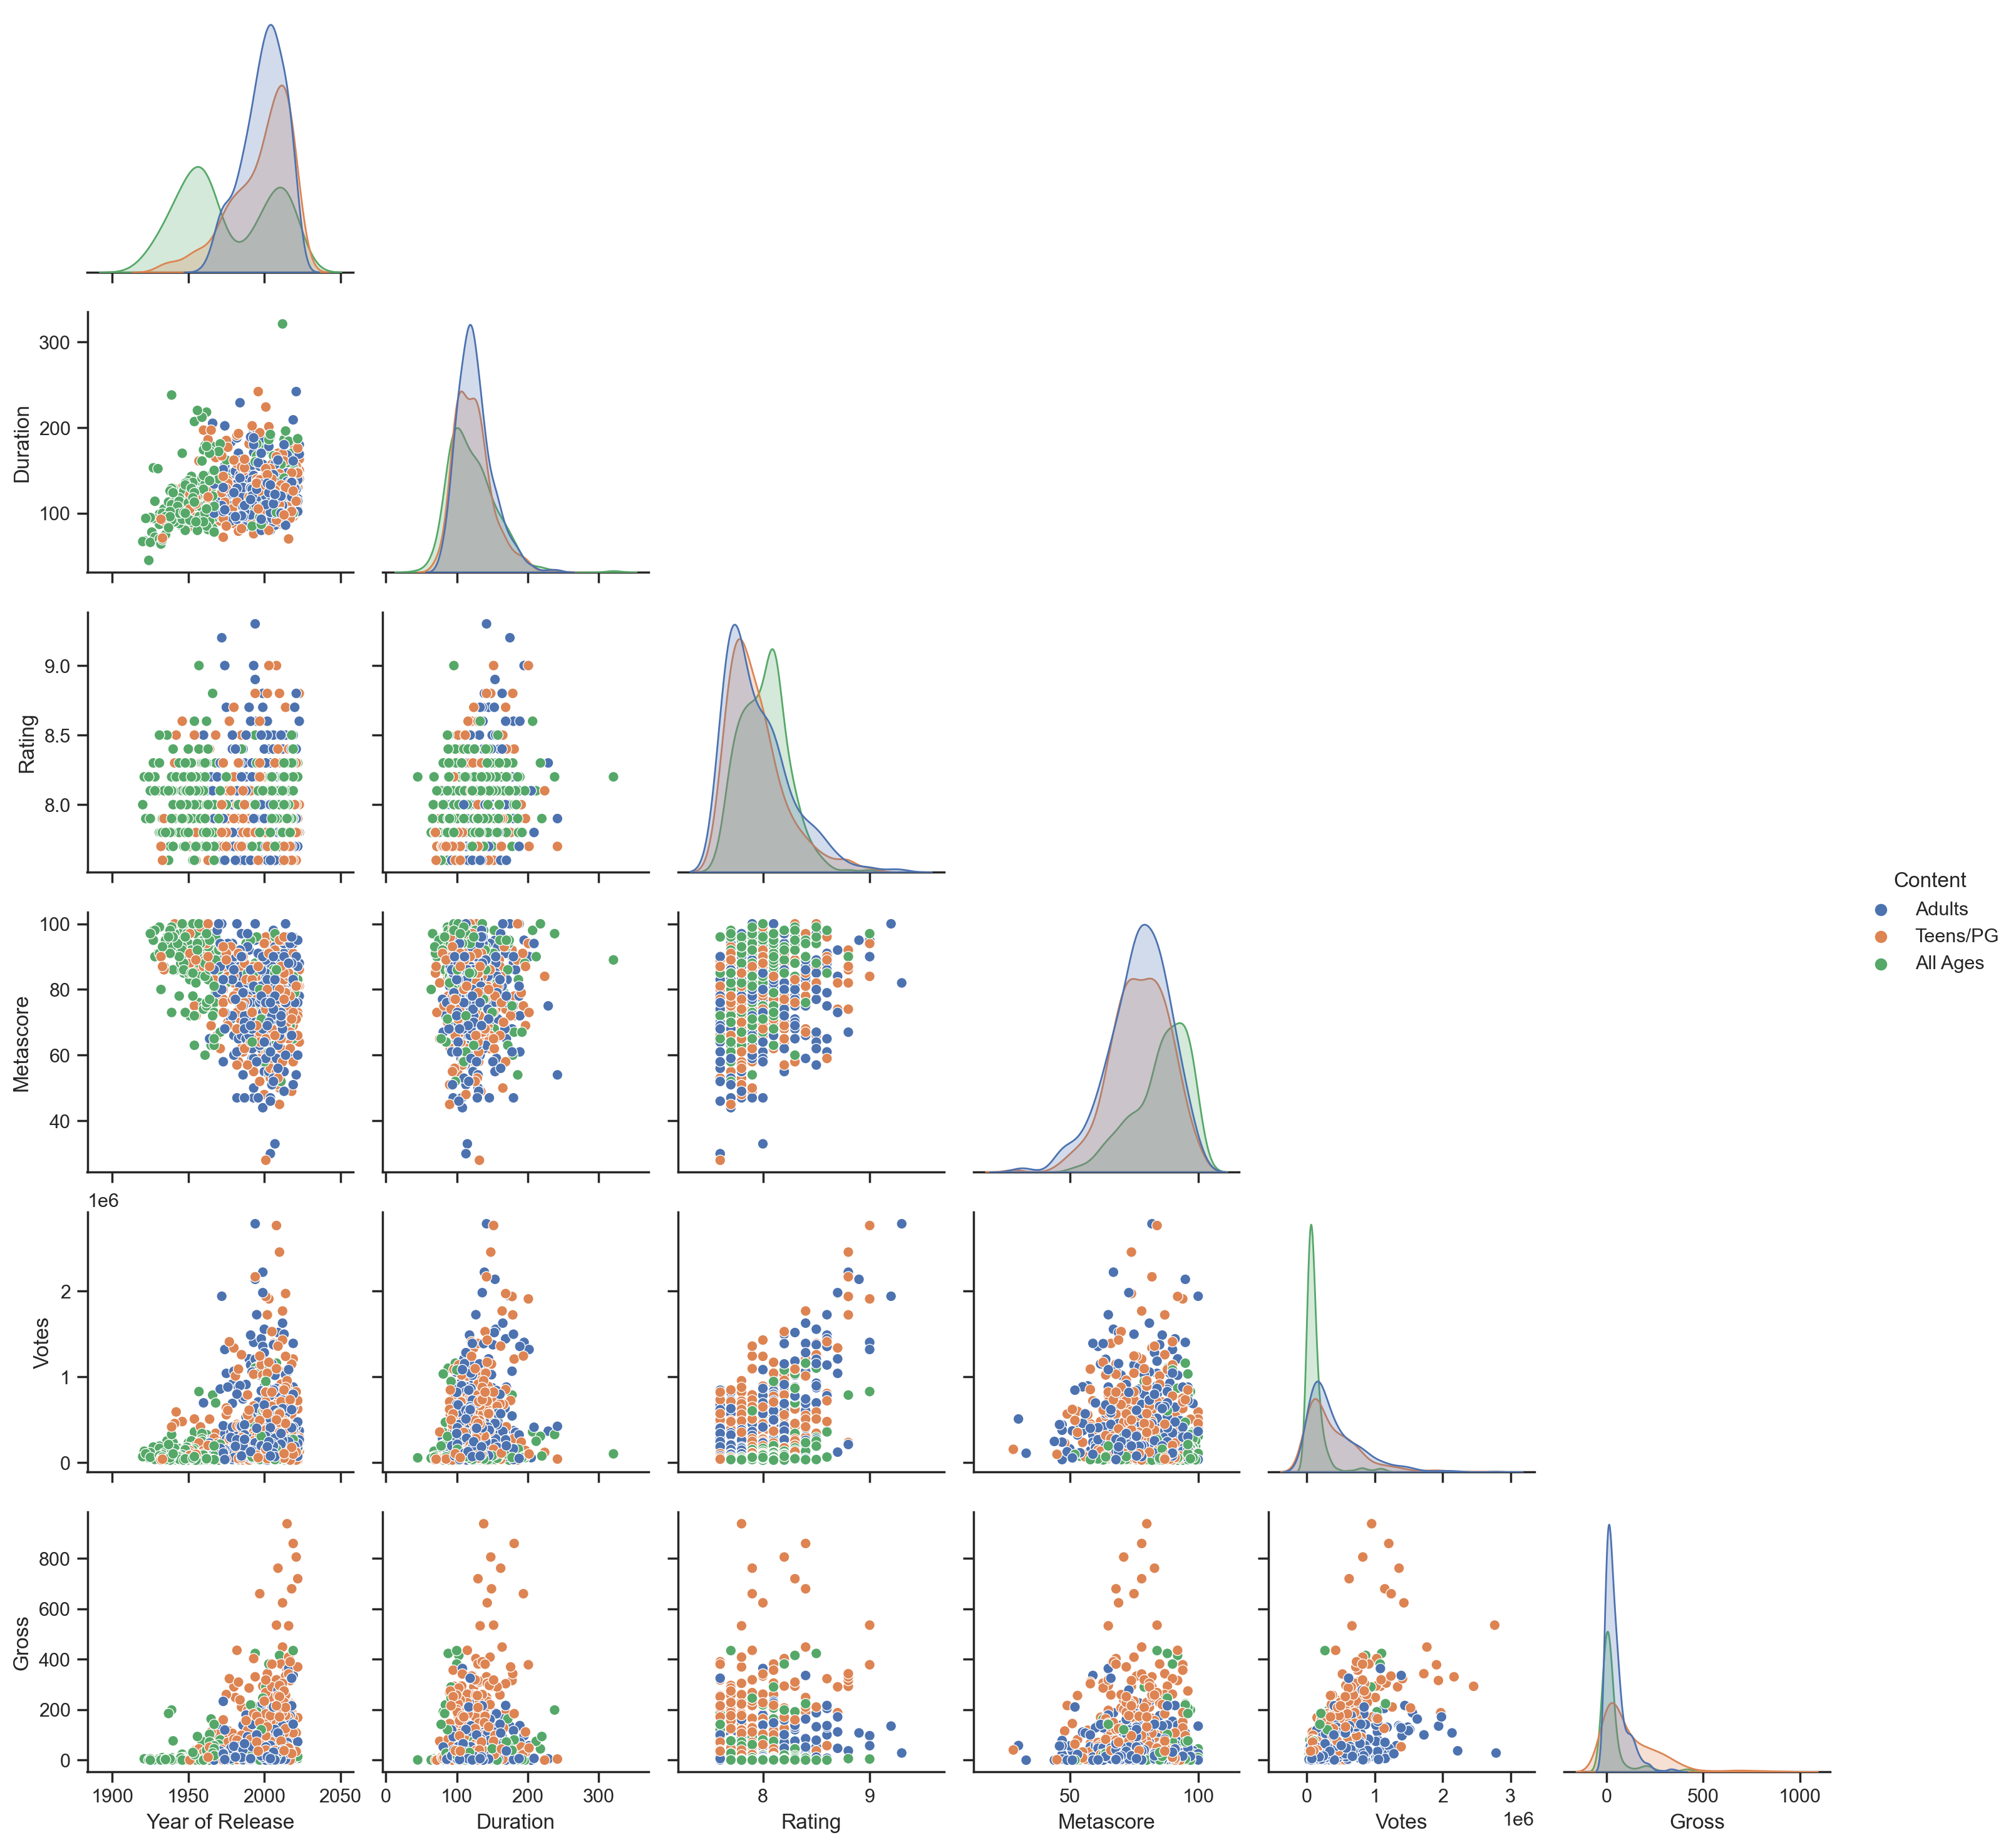

In [47]:
sns.pairplot(df.iloc[:, :12], corner=True, diag_kind='kde', hue ='Content');

**Note:**

Upon observing the pairplot, distinct patterns become evident that were not immediately apparent from the correlation analysis:
- Relationships between `Year of Release` and variables such as `Votes`, `Gross`, and `Metascore` manifest more prominently in the pairplot compared to the correlation coefficients mentioned earlier.
- Furthermore, a captivating pattern materializes when exploring the interplay between `Gross` and both `Rating` and `Metascore`. This intriguing relationship is more vividly captured in the pairplot, revealing potential insights not fully depicted by mere correlation values.

### 5.4. Trends and Time Series Analysis

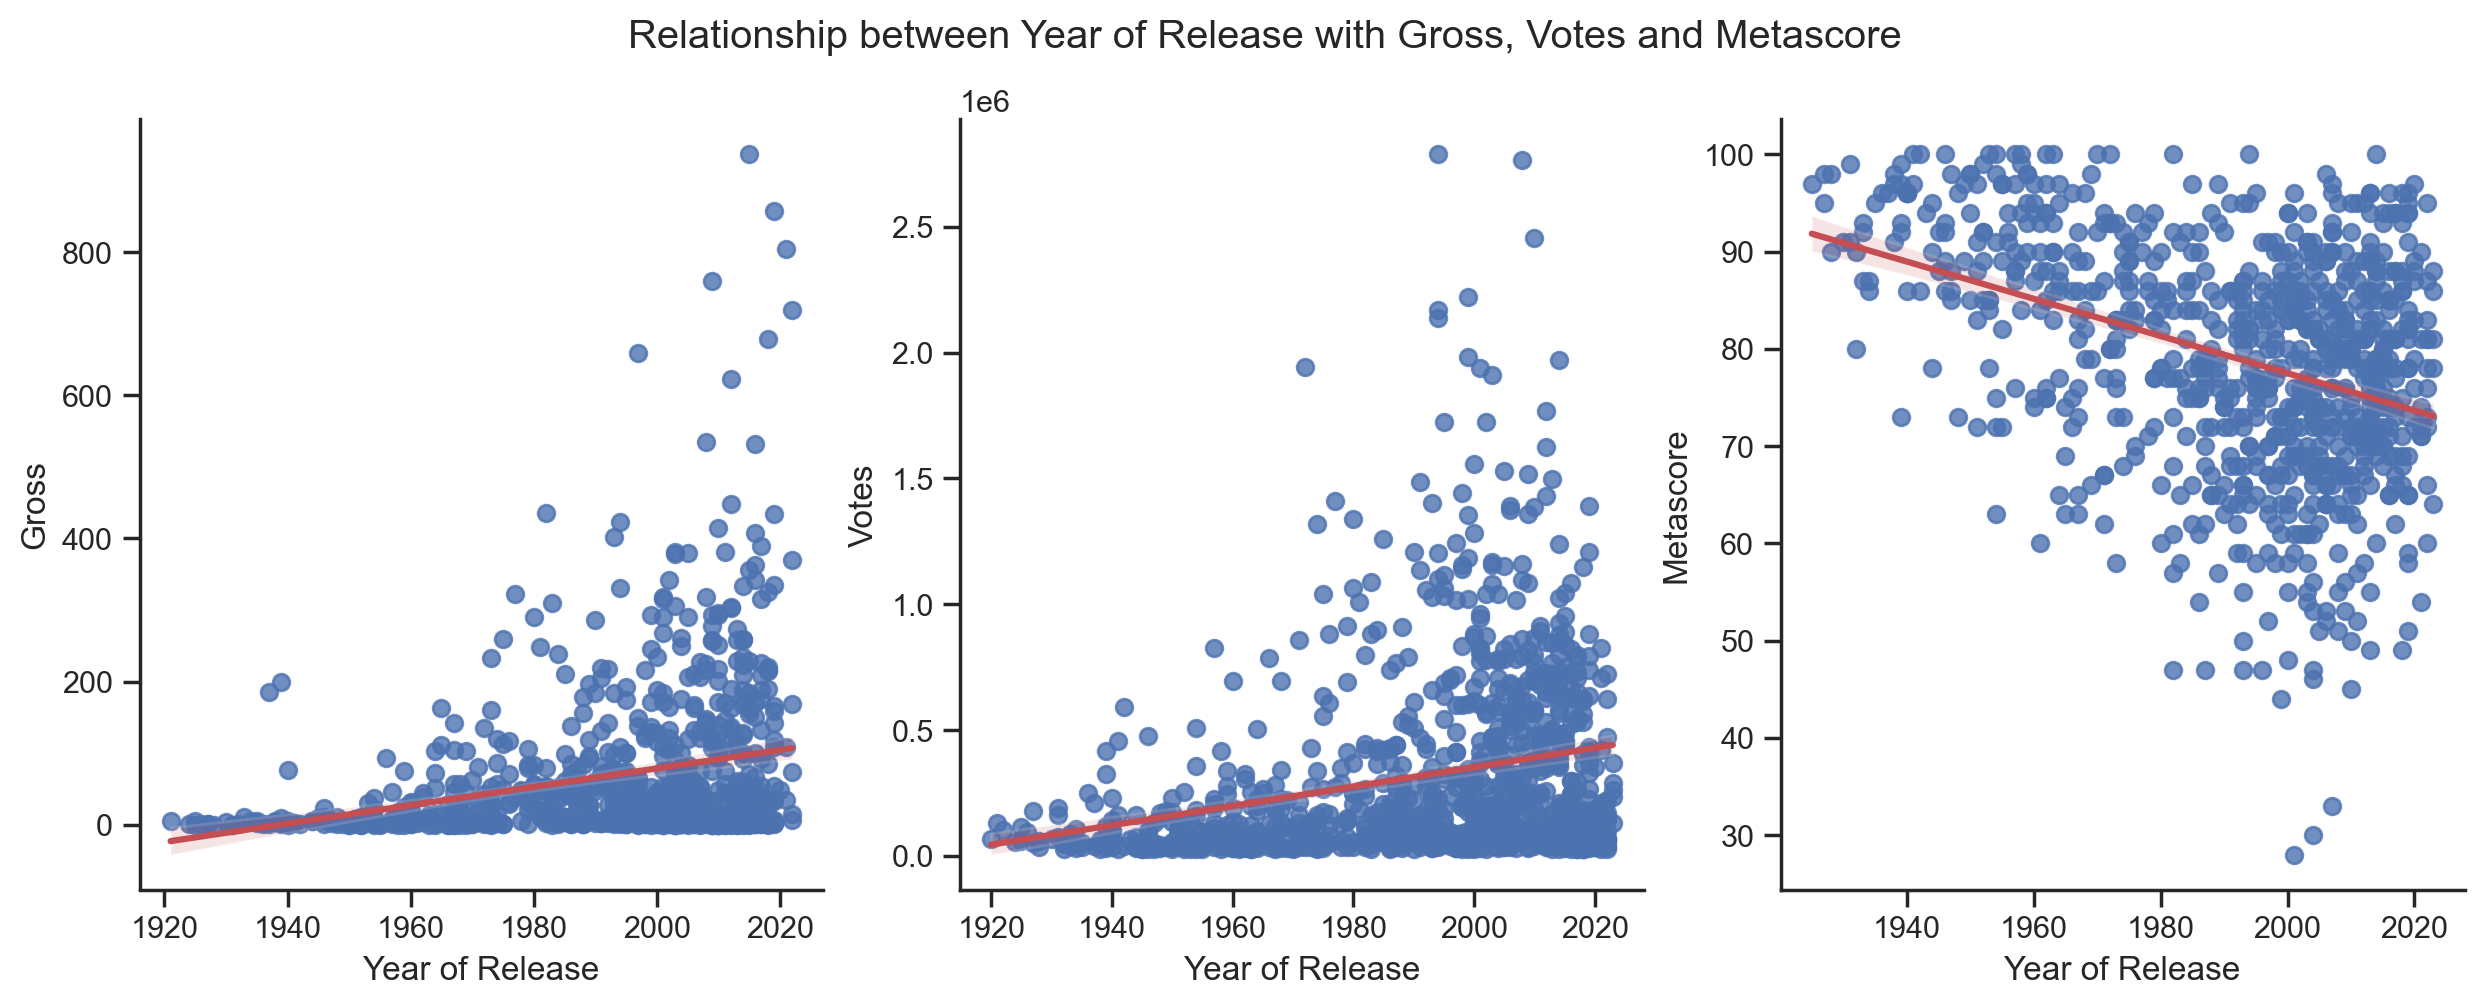

In [48]:
_, axes = plt.subplots(1,3, figsize=(15,5))

for i, col in enumerate(['Gross','Votes','Metascore']):
    sns.regplot(data=df, x='Year of Release', y=col, ax=axes[i], line_kws={'color': 'r'})

plt.suptitle('Relationship between Year of Release with Gross, Votes and Metascore');

**Note:**

Indeed, a positive correlation exists between the `Gross` and `Votes` metrics with the `Year of Release` in the dataset. This correlation can be attributed to the expanding global population and the growing accessibility to movies over time. As the population increases, more individuals have the opportunity to watch and engage with movies, leading to higher movie revenues (`Gross`) and greater participation in rating and reviewing (`Votes`).

However, it's important to note that a recent trend shows a negative correlation between the `Metascore` and the `Year of Release`. This suggests that movies released more recently have been receiving lower Metascores compared to those in the past so more analysis should be conducted to check this assumption.

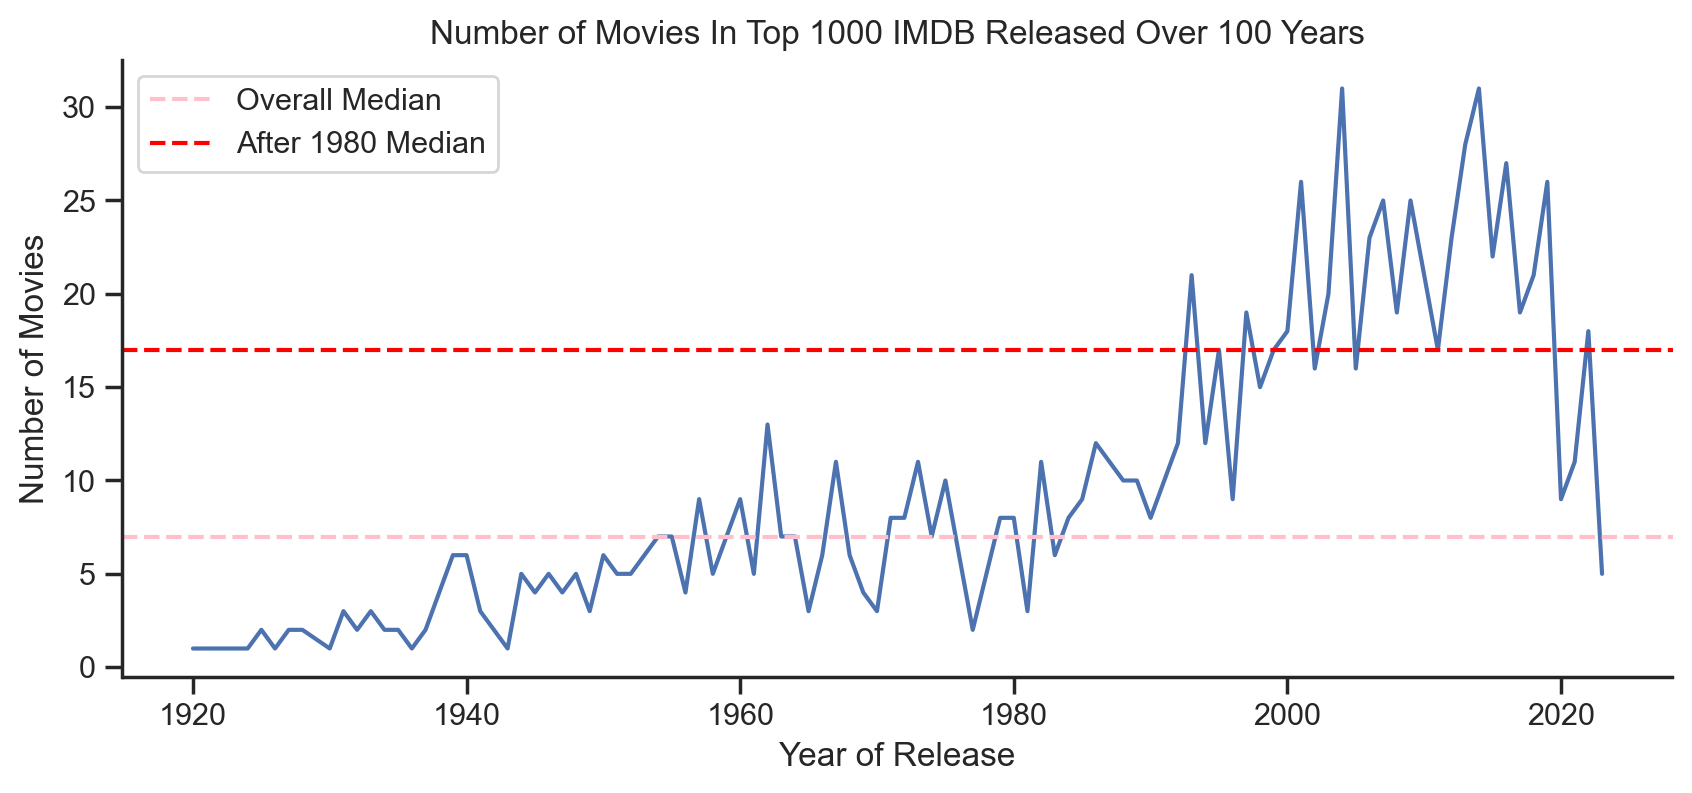

In [49]:
plt.figure(figsize=(10, 4))
movies_by_year = df.groupby('Year of Release')['Year of Release'].count().reset_index(name='Count')
sns.lineplot(data=movies_by_year, x='Year of Release', y='Count')
plt.title('Number of Movies In Top 1000 IMDB Released Over 100 Years')
plt.ylabel('Number of Movies')
plt.axhline(y=movies_by_year['Count'].median(), color='pink', linestyle='--', label='Overall Median')
plt.axhline(y=movies_by_year[movies_by_year['Year of Release'] > 1980]['Count'].median(), color='red', linestyle='--', label='After 1980 Median')
plt.legend();

In [50]:
print(f"The number of movies in top 1000 IMDB repleased after 1980 is {len(df[df['Year of Release'] > 1980])}.")

The number of movies in top 1000 IMDB repleased after 1980 is 717.


**Note:** 

The analysis of the number of movies within the top 1000 IMDB list over a span of 100 years reveals some interesting trends. It is evident that the number of movies listed on the top 1000 gradually increases as the years progress. On average, approximately 7 movies are added to the list each year. This dynamic implies that, **for every 7 new films that make their way onto the top 1000, an equivalent number exit the list**.

After the year 1980, a notable surge in movie listings is observed, with a median of around 16 movies being added each year. Particularly since the year 2000, the rate of new movie additions appears to surpass the median of the "after 1980" period. However, there is a slight drop below the "after 1980" median in the year 2020, indicating a potential anomaly or a temporary shift in the trend.

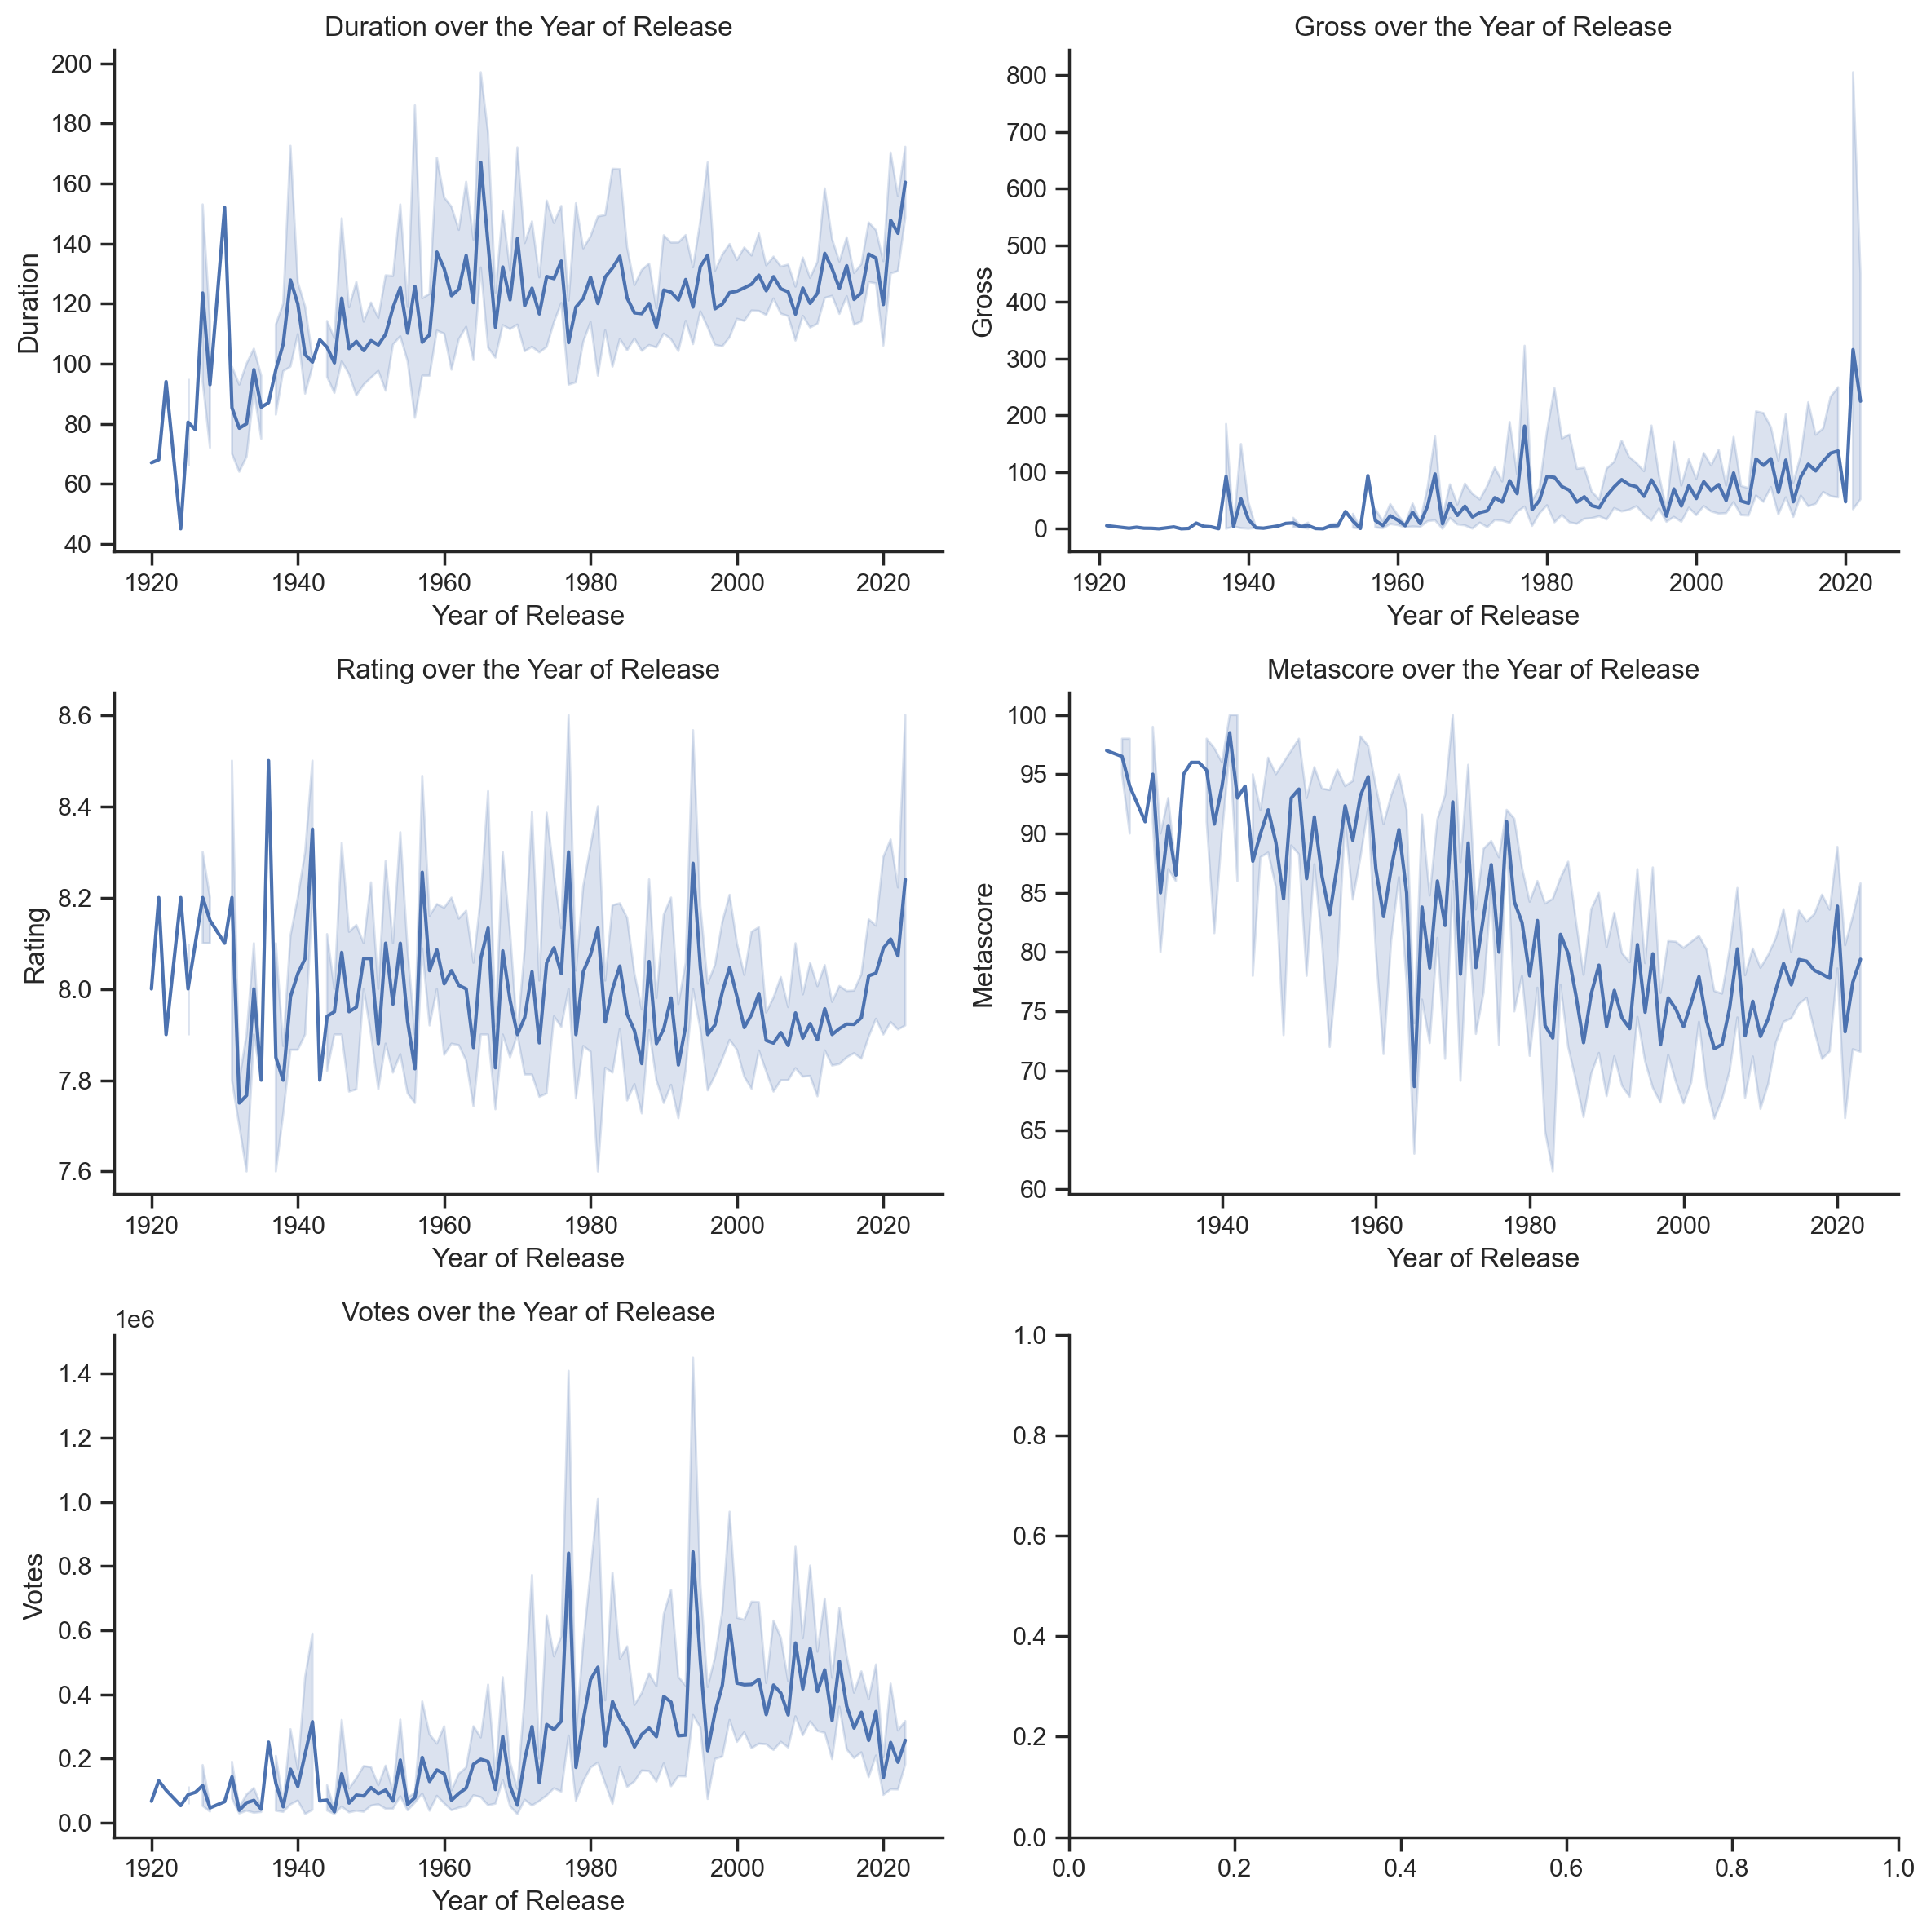

In [51]:
_, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, col in enumerate(['Duration', 'Gross', 'Rating', 'Metascore', 'Votes']):
    sns.lineplot(data=df, x='Year of Release', y=col, ax=axes[i//2, i%2], palette='Blues')
    axes[i//2, i%2].set_title(f'{col} over the Year of Release')

plt.tight_layout();


**Note:** 

Analyzing the various movie attributes over the `Year of Release` through line plots reveals intriguing insights:

- **`Duration`, `Gross`, and `Votes`:** There's a clear positive correlation between the year of release and the movie's duration, gross revenue, and the number of votes received. Over the years, movies listed on the top 1000 IMDB tend to be longer in duration, generate higher gross revenue, and attract more votes from viewers. Interestingly, despite the drop in the number of movies listed from 2020, the gross revenue for films from this year onwards reaches its peak. This suggests that although fewer films made the cut in 2020, they managed to achieve higher financial success.

- **`Rating` and `Metascore`:** The relationship with Rating appears to be relatively neutral, implying that the year of release is not a strong determinant of a movie's IMDb rating. This suggests that the quality of a movie, as indicated by user ratings, is not inherently linked to the year it was created. The relationship with Metascore, however, takes a more intriguing turn. While there's a weak negative correlation with Year of Release, it's important to interpret this in the context of the evolving top 1000 IMDB list. Older movies tend to have higher Metascores, potentially because they have stood the test of time and have been curated over the years based on their quality. This contrasts with the more dynamic nature of the list for more recent movies, which can result in lower Metascores as the list continually evolves with each new blockbuster.

In [52]:
df['Year Range'] = pd.cut(
    df['Year of Release'],         
    bins=[1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2023], 
    labels=['1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2023'] 
)

df.groupby('Year Range')[['Duration','Gross','Rating','Metascore','Votes']].agg(['count','mean']).round(1).T

Year Range       1920-1930  1930-1940  1940-1950  1950-1960  1960-1970  \
Duration  count       11.0       31.0       38.0       64.0       65.0   
          mean        93.7      103.7      107.1      118.7      127.8   
Gross     count        9.0       21.0       17.0       41.0       43.0   
          mean         2.0       24.2        5.0       13.9       33.7   
Rating    count       11.0       31.0       38.0       64.0       65.0   
          mean         8.1        8.0        8.0        8.0        8.0   
Metascore count        6.0       25.0       27.0       52.0       56.0   
          mean        94.8       92.1       91.4       88.9       84.0   
Votes     count       11.0       31.0       38.0       64.0       65.0   
          mean     86274.0   106548.4   110300.8   132401.0   133842.1   

Year Range       1970-1980  1980-1990  1990-2000  2000-2010  2010-2023  
Duration  count       73.0       88.0      150.0      222.0      257.0  
          mean       123.8      122.2      124.4      124.4      131.6  
Gross     count       56.0       81.0      138.0      205.0      197.0  
          mean        58.6       60.1       62.7       79.7      106.7  
Rating    count       73.0       88.0      150.0      222.0      257.0  
          mean         8.0        7.9        8.0        7.9        8.0  
Metascore count       64.0       79.0      136.0      200.0      201.0  
          mean        82.2       76.5       75.2       74.9       78.0  
Votes     count       73.0       88.0      150.0      222.0      257.0  
          mean    287400.0   298167.3   431860.6   426033.9   342785.7

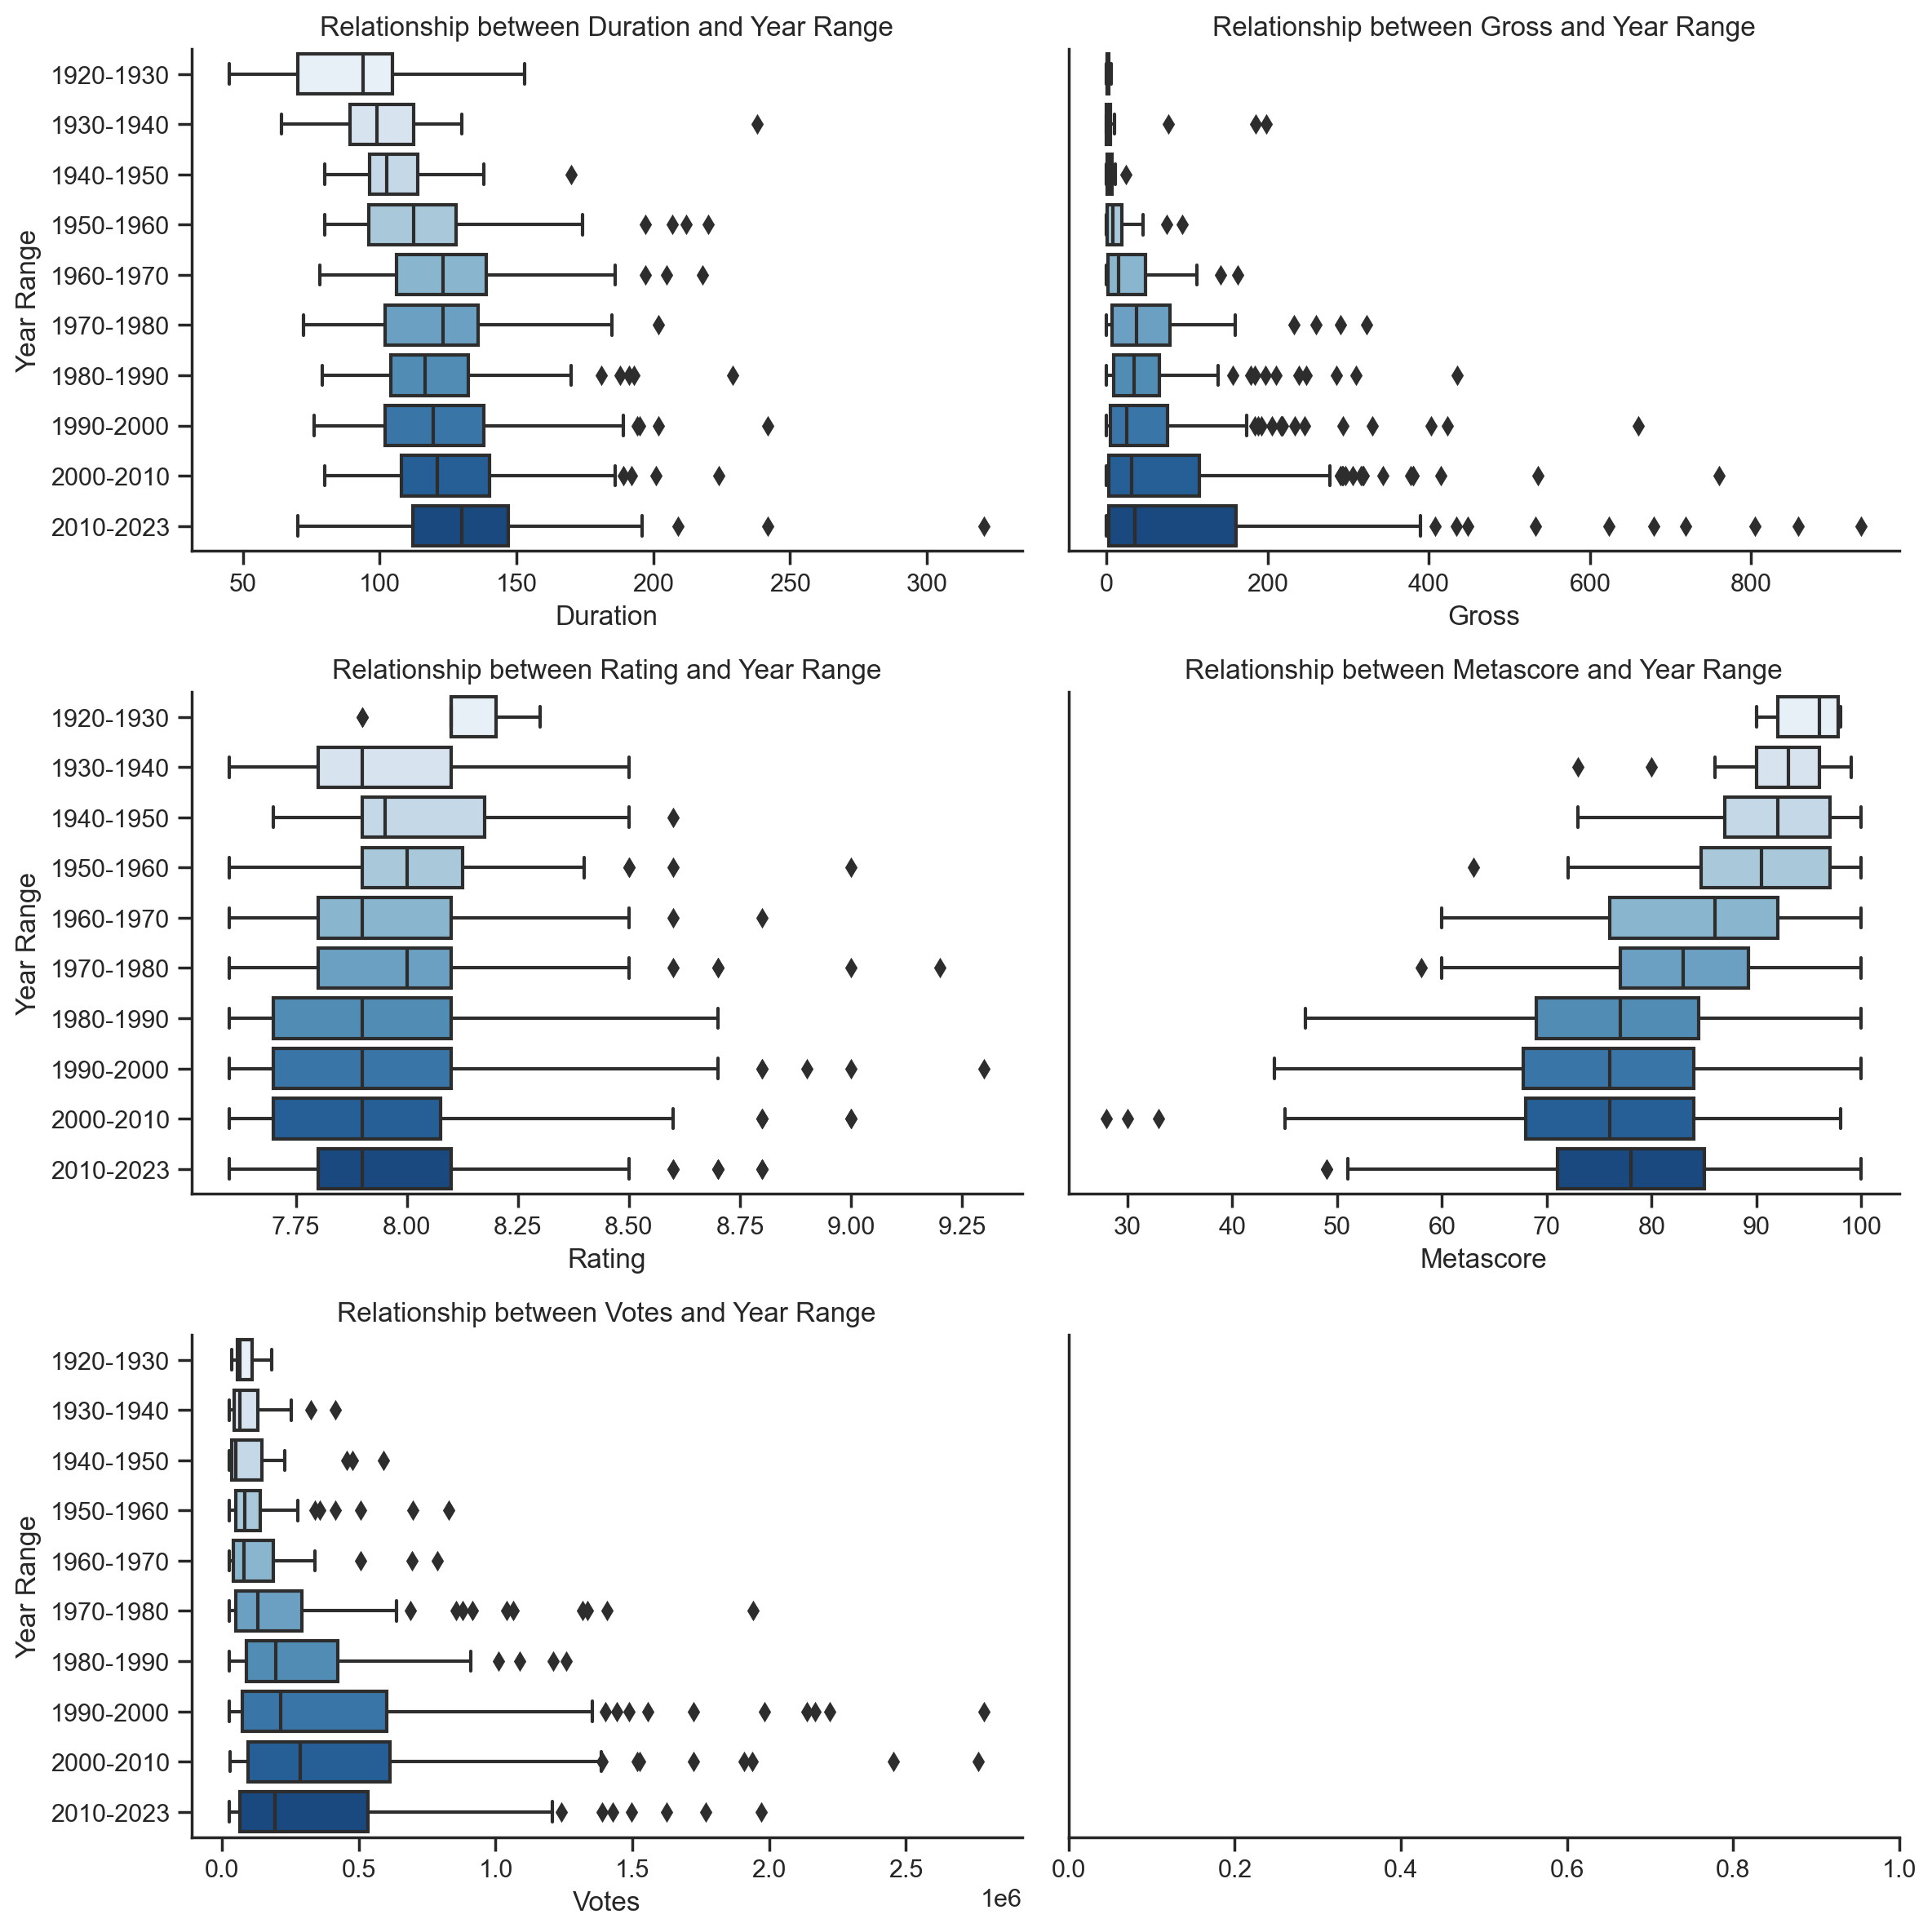

In [53]:
_, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, col in enumerate(['Duration', 'Gross', 'Rating', 'Metascore', 'Votes']):
    sns.boxplot(data=df, y='Year Range', x=col, ax=axes[i//2, i%2], palette='Blues')
    axes[i//2, i%2].set_title(f'Relationship between {col} and Year Range')
    if i >=1:
        axes[i//2, 1].set_ylabel('')
        axes[i//2, 1].set_yticks([])

plt.tight_layout();

**Note:** 
- Similar pattern to the lineplot in the last part is seen when I split `Years of Release` into `Year Range`

### 5.5. Rating Factor Comparison

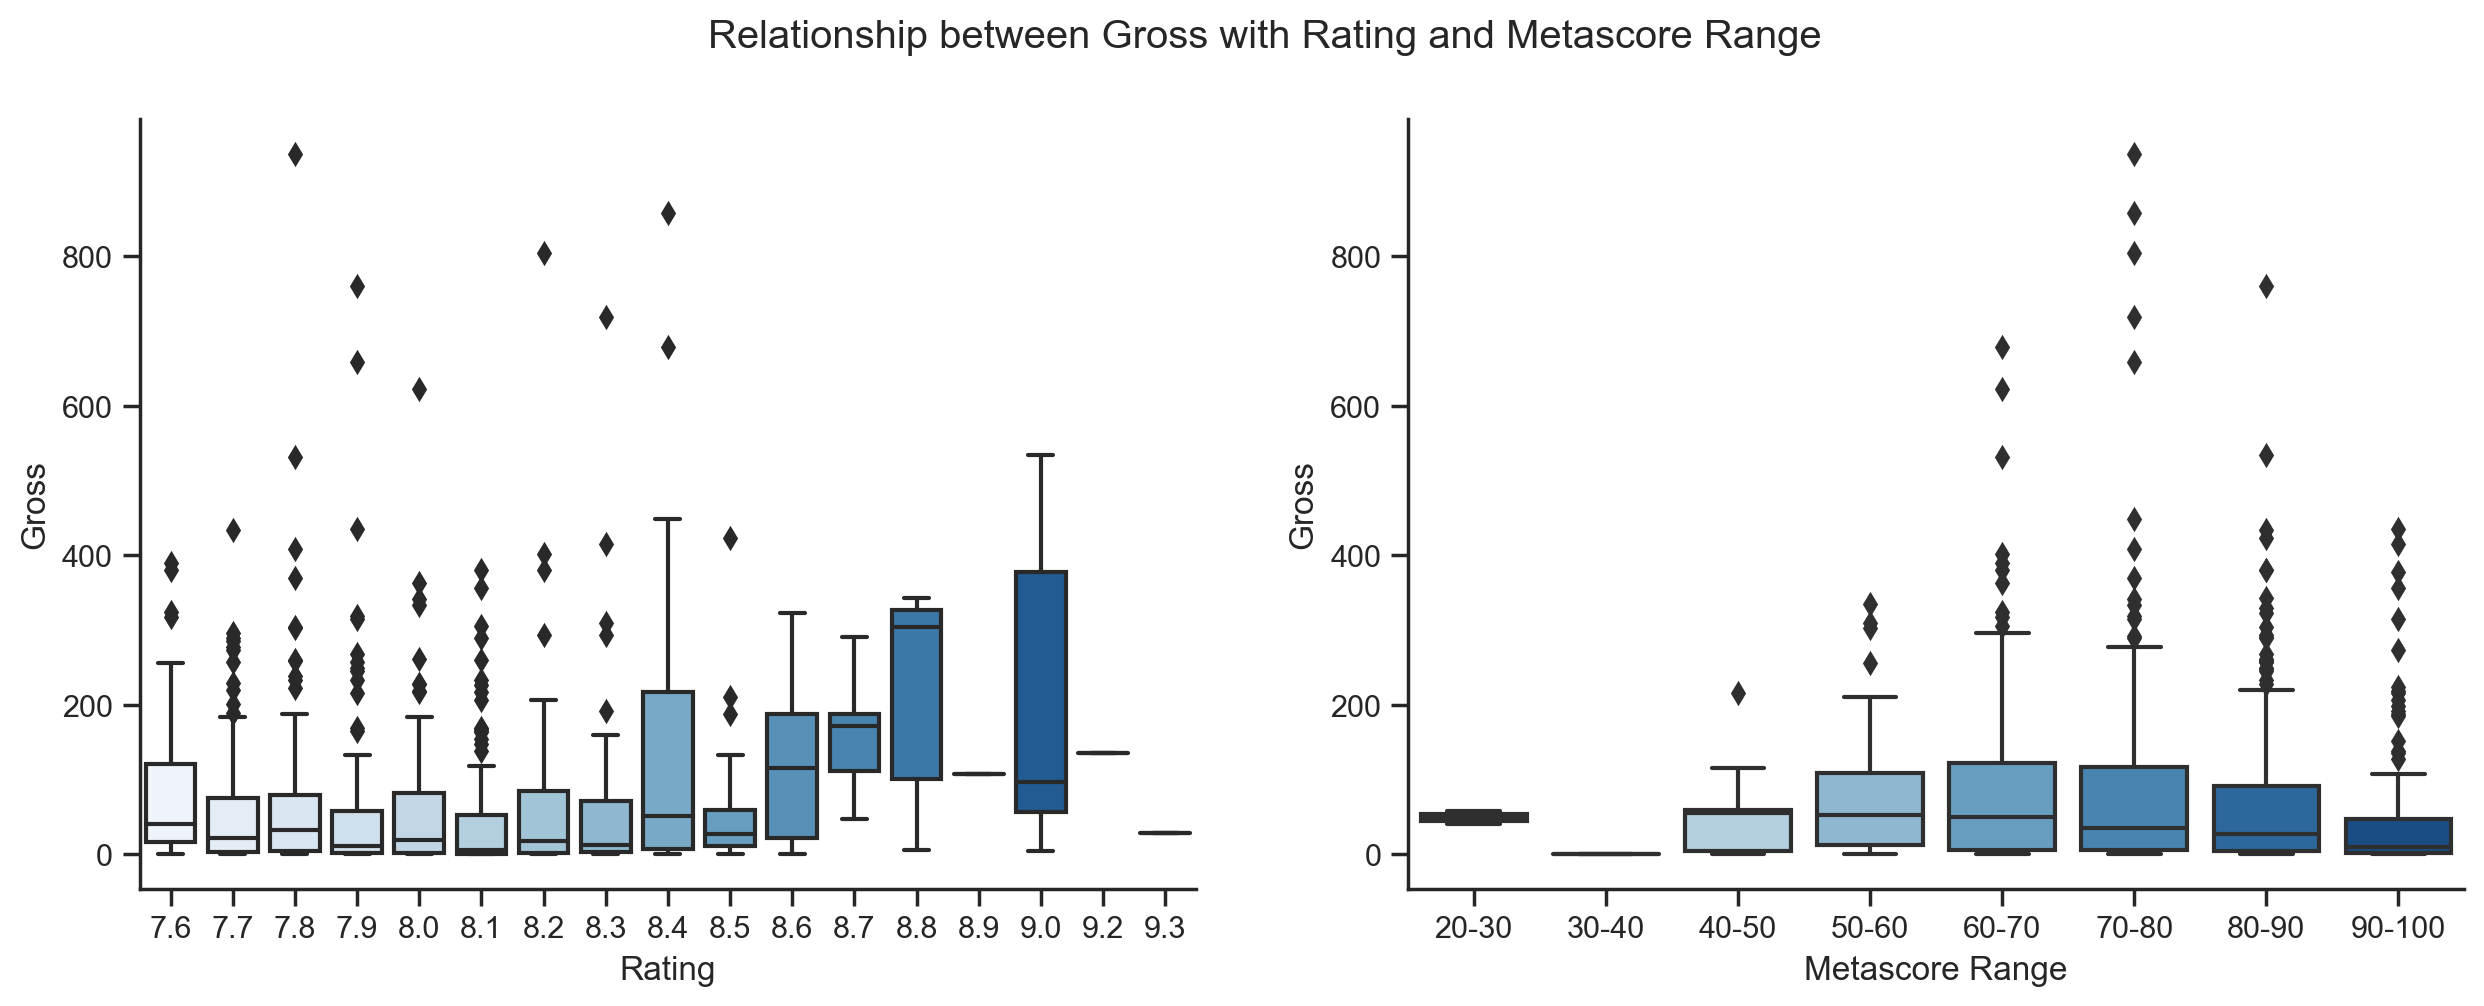

In [54]:
metascore_bins = np.arange(20, 110, 10)
df['Metascore Range'] = pd.cut(df['Metascore'], bins=metascore_bins, labels=[f"{i}-{i+10}" for i in range(20, 100, 10)])

_, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['Rating', 'Metascore Range']):
    sns.boxplot(data=df, y='Gross', x=col, ax=axes[i], palette='Blues')

plt.suptitle('Relationship between Gross with Rating and Metascore Range');

**Note:**

Firstly, it becomes evident that the average `Gross` earnings for movies within the top 1000 IMDB list tend to fall within the range of $50-100 million. Notably, movies that have received a high `Rating` of around 8.4 exhibit a higher `Gross`, suggesting a positive correlation between these two metrics.

However, when considering the `Metascore` metric, an interesting pattern emerges. Movies with `Metascores` in the range of 60-80 tend to have higher `Gross` earnings, indicating a favorable reception among both critics and audiences. Surprisingly, movies with `Metascores` ranging from 80 to 100 exhibit comparatively lower `Gross` earnings. This may suggest that exceptionally high `Metascores` do not always directly translate to higher financial success.

Notably, the minimum `Rating` value observed in the dataset is 7.6, indicating a certain threshold for inclusion in the top 1000 IMDB movies. However, intriguingly, there are instances where movies receive lower `Metascores`, particularly falling within the range of 20-40. This divergence between audience and critic assessments underscores the complex interplay between various factors influencing a movie's overall reception and success.

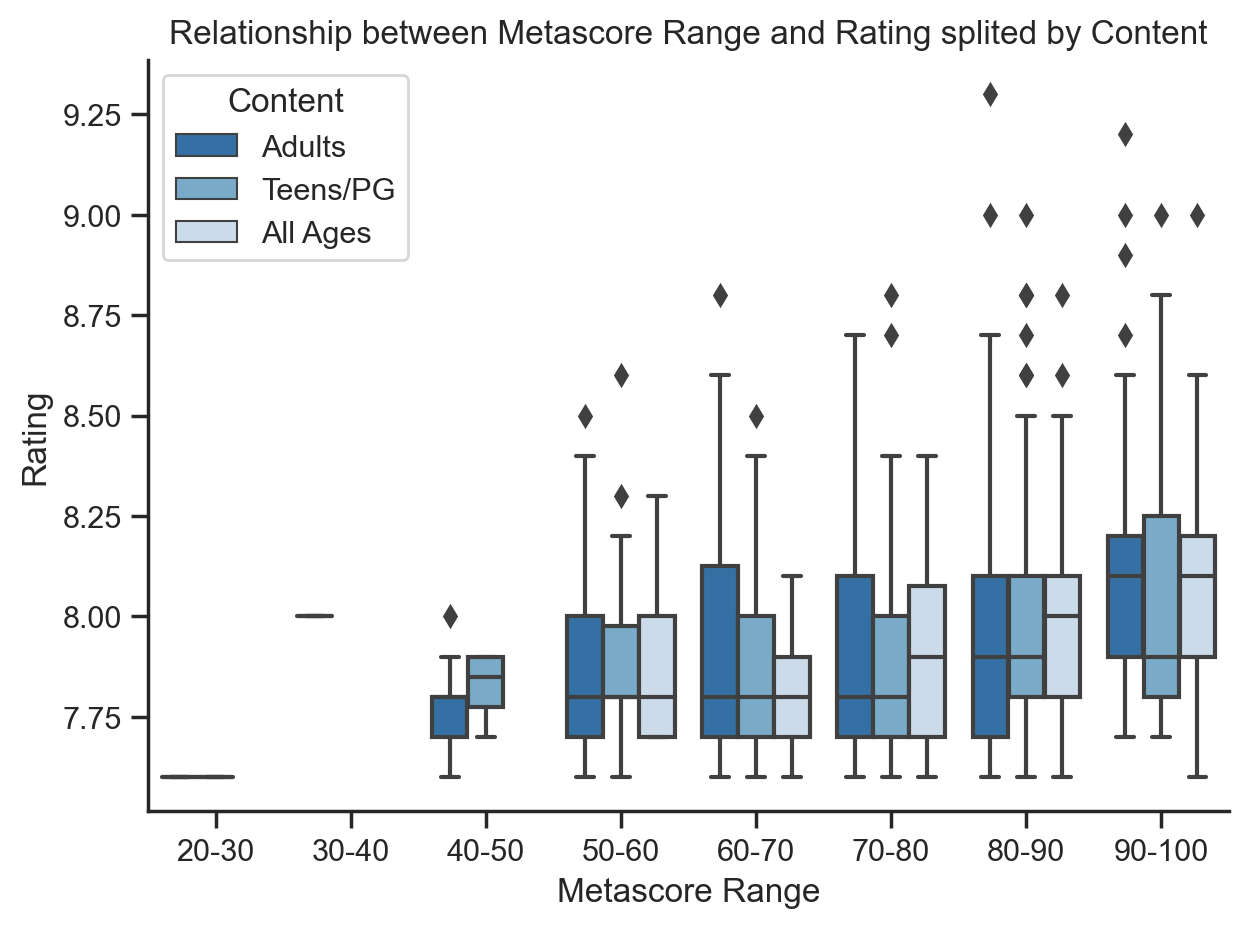

In [55]:
sns.boxplot(data=df, x='Metascore Range', y='Rating', palette='Blues_r',hue='Content')
plt.title('Relationship between Metascore Range and Rating splited by Content')
plt.tight_layout();

**Note:** 

The box plot illustrating the relationship between `Metascore Range` and `Rating`, segmented by `Content` type, uncovers an intriguing trend:

While the interquartile range (IQR) of ratings remains relatively consistent for metascore ranges above 50, an interesting divergence occurs in the range of 60 to 80 metascores. During this range, movies labeled as "Adult" content exhibit higher ratings compared to those classified as "Teens/PG" and "All Ages." Moreover, the "All Ages" category lacks movies with metascores under 50, suggesting a potential correlation between lower metascores and content appropriateness for all audiences.

An interesting correlation can also be observed between movies with higher metascores and higher ratings, indicating some level of alignment between critical and audience acclaim. 

### 5.6. Duration Factor Comparison

In order to analyze movie durations more effectively, I've divided the "Duration" variable into three meaningful bins: "< 90 min," "90-150 min," and "150 min >." This decision is informed by key statistics:

- The minimum movie duration in our dataset is 45 minutes, fitting neatly within the "< 90 mins" category.
- The median duration is 120 minutes, which aligns well with the "90-150 mins" category, capturing the majority of movies.
- The maximum duration, at 321 minutes, appropriately falls into the "150 mins >" category.

This categorization strategy ensures a comprehensive coverage of different movie lengths and enables us to explore potential relationships and trends based on duration intervals.

In [56]:
bin_edges = (0,90, 150, float('inf'))

bin_labels = ['< 90 min', '90 - 150 min', '> 150 min']

df['Duration Bin'] = pd.cut(df['Duration'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [57]:
average_rating_by_bin = df.groupby('Duration Bin')[['Rating','Metascore', 'Votes', 'Gross']].agg(['count', 'mean']).round(2)
average_rating_by_bin

Rating       Metascore        Votes            Gross       
              count  mean     count   mean count       mean count   mean
Duration Bin                                                            
< 90 min         76  7.92        59  82.27    76  168553.82    55  42.97
90 - 150 min    759  7.94       664  78.66   759  318359.53   620  69.32
> 150 min       165  8.12       123  79.42   165  399471.04   133  85.96

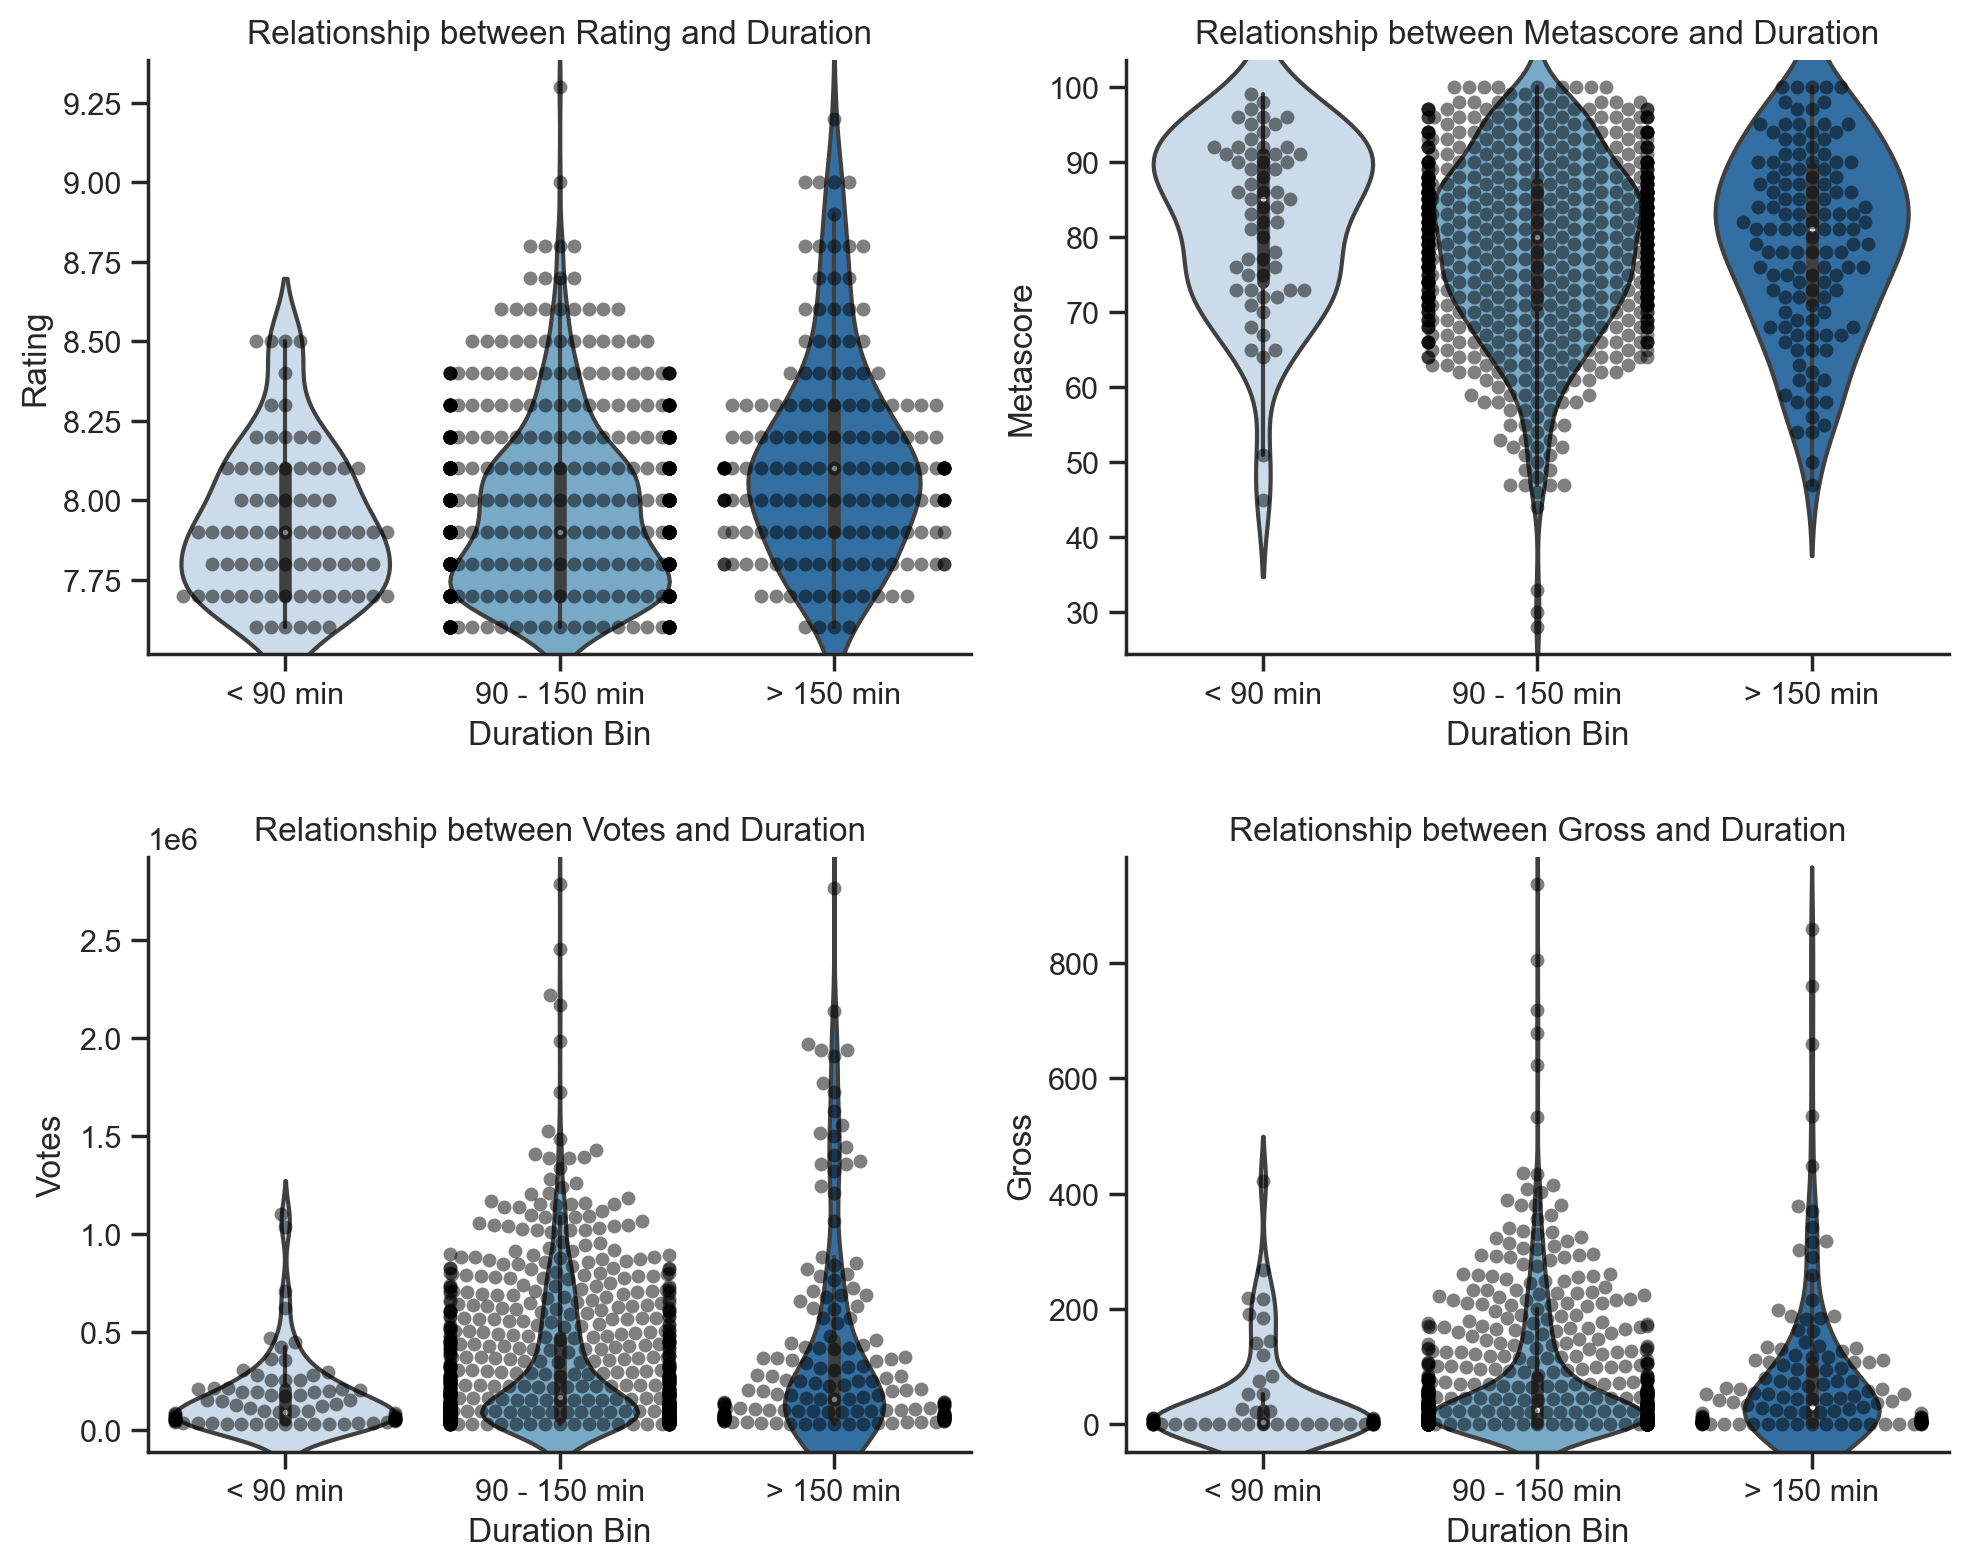

In [58]:
_, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(['Rating', 'Metascore', 'Votes', 'Gross']):
    sns.violinplot(data=df, x='Duration Bin', y=col, ax=axes[i//2, i%2], palette='Blues')
    sns.swarmplot(data=df, x='Duration Bin', y=col, ax=axes[i//2, i%2], color='black', alpha=0.5) 
    axes[i//2, i%2].set_title(f'Relationship between {col} and Duration')

plt.tight_layout();

**Note:**

Upon examining the descriptive statistics and visualizations, several insights emerge regarding the distribution of movie durations and their relationships with various factors:

- The majority of movies, totaling 759, fall within the duration range of 90 to 150 minutes. On the other hand, the smallest category comprises films under 90 minutes, numbering 76.

- The first violin-swarm plot suggests a positive relationship between movie duration and their Rating scores. Interestingly, all movies with Rating scores above 9 have durations exceeding 90 minutes.

- The second violin-swarm plot, illustrating the association between movie duration and Metascore, indicates that films in all three duration categories share a relatively similar spread of Metascores, ranging from 40 to 100. Nevertheless, movies with longer durations tend to exhibit higher Metascores, whereas the "90 -150 min" category showcases a few instances of low Metascores.

- The third and fourth plots demonstrate the connections between movie duration and Votes, as well as Gross revenue. Similar to the trend observed in the Rating plot, movies within the 90-150 minutes range enjoy the most substantial representation, while longer durations correlate with higher Votes and Gross revenue.



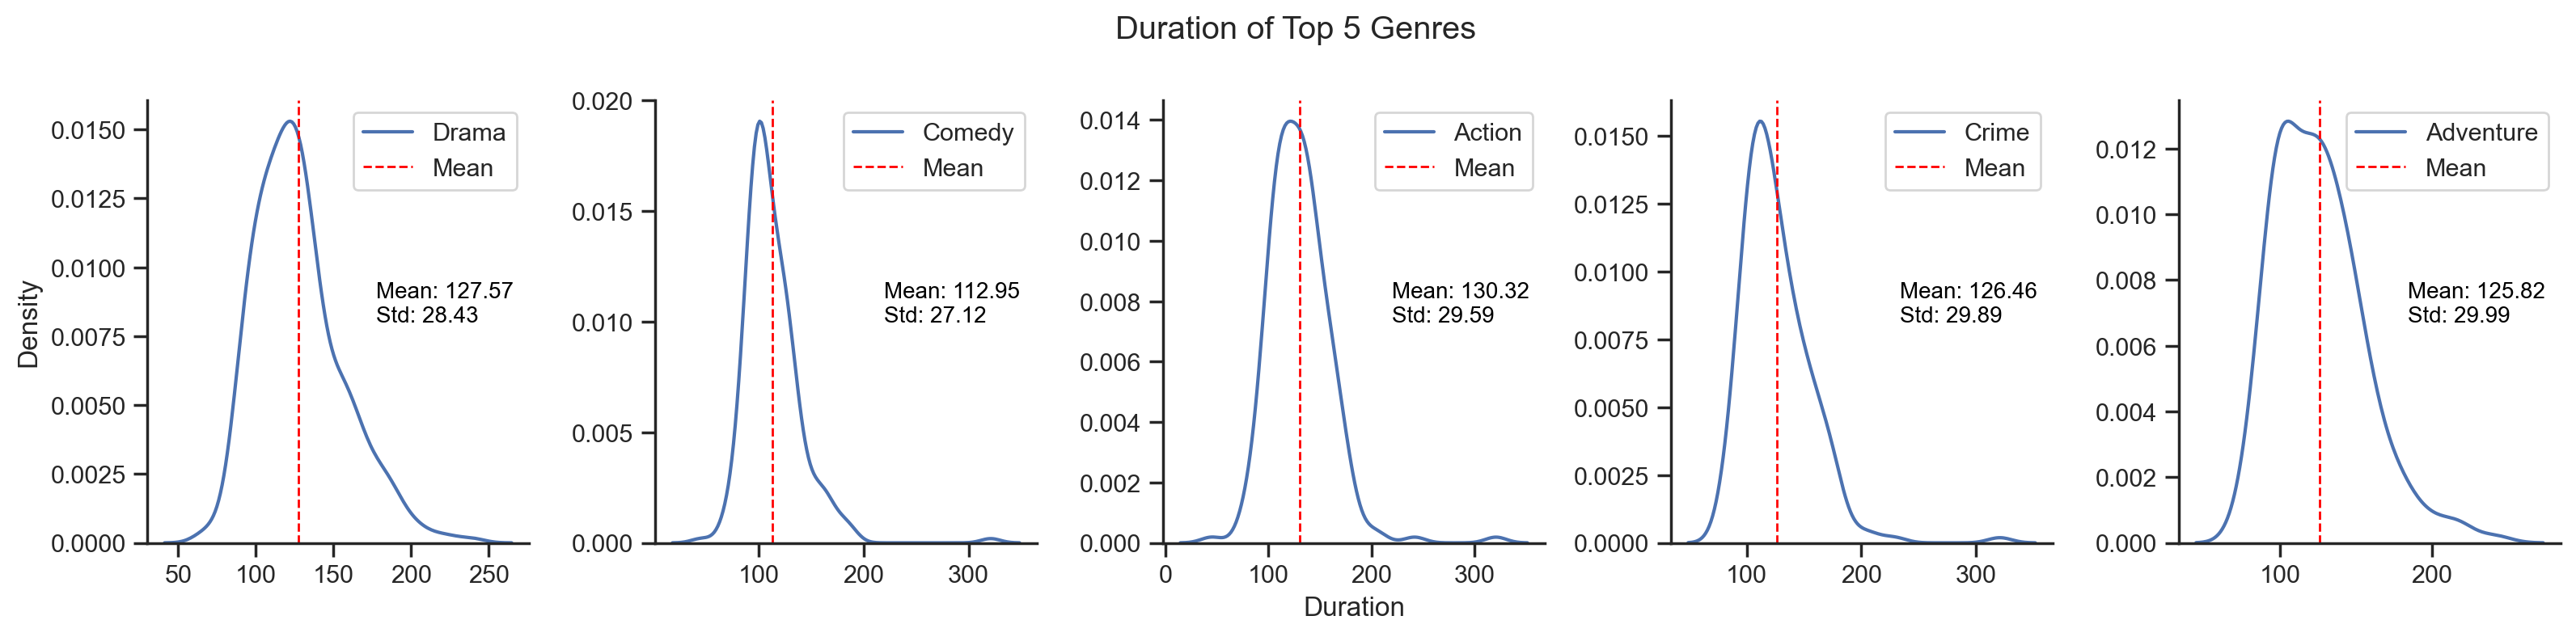

In [59]:
top5_genre = genre_count.index[:5].to_list()
plt.figure(figsize=(16, 4))

for i, col in enumerate(top5_genre, 1):
    plt.subplot(1, 5, i)  
    sns.kdeplot(data=df[df[col] == 1], x='Duration', label=col)
    
    mean_duration = df[df[col] == 1]['Duration'].mean()
    std_duration = df[df[col] == 1]['Duration'].std()

    plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1, label='Mean')
    
    plt.ylabel('Density' if i == 1 else '')
    plt.xlabel('Duration' if i == 3 else '')
    plt.legend()
    
    plt.annotate(f'Mean: {mean_duration:.2f}\nStd: {std_duration:.2f}', 
                 xy=(0.6, 0.5), xycoords='axes fraction', fontsize=10, color='black')

plt.suptitle('Duration of Top 5 Genres')
plt.tight_layout();

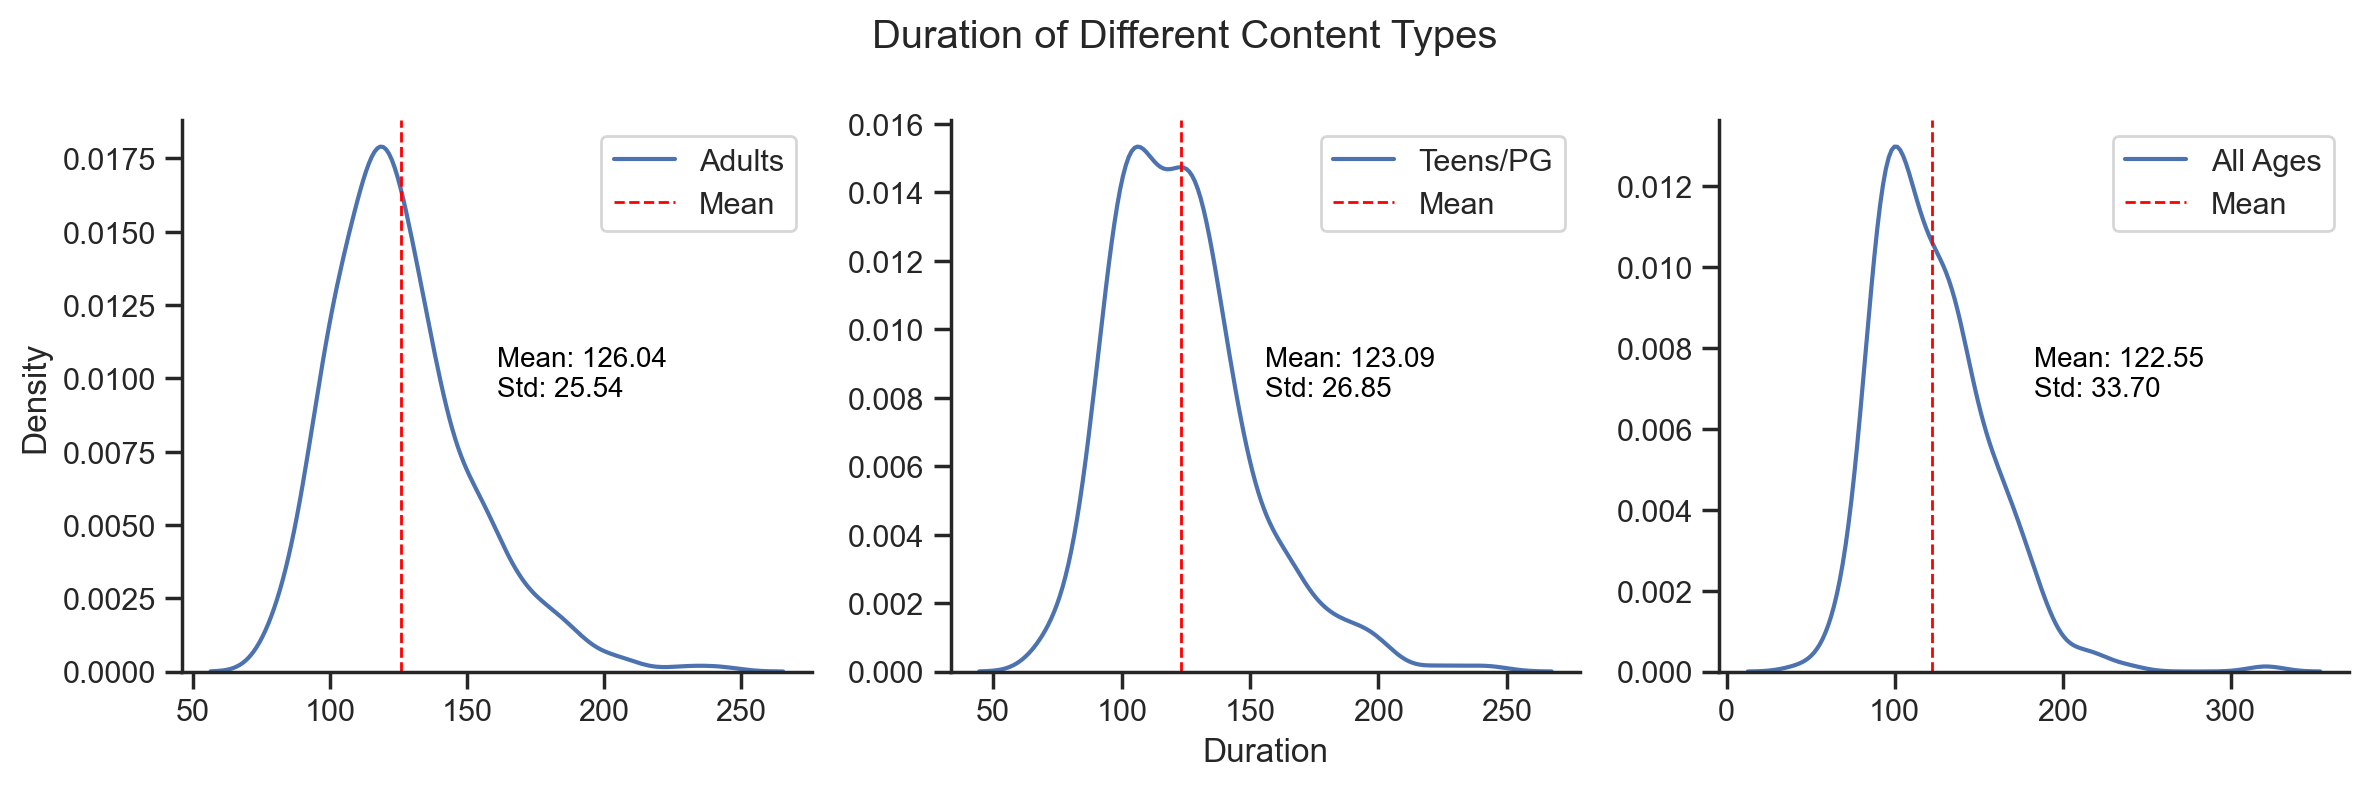

In [60]:
content = list(df['Content'].dropna().unique())
plt.figure(figsize=(12, 4))

for i, col in enumerate(content, 1):
    plt.subplot(1, 3, i)  
    sns.kdeplot(data=df[df['Content'] == col], x='Duration', label=col)
    
    mean_duration = df[df['Content'] == col]['Duration'].mean()
    std_duration = df[df['Content'] == col]['Duration'].std()
    
    plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.ylabel('Density' if i == 1 else '')
    plt.xlabel('Duration' if i == 2 else '')
    plt.legend()
    
    plt.annotate(f'Mean: {mean_duration:.2f}\nStd: {std_duration:.2f}', 
                 xy=(0.5, 0.5), xycoords='axes fraction', fontsize=10, color='black')

plt.suptitle('Duration of Different Content Types')
plt.tight_layout();

**Note:**

Upon analyzing the distributions of duration among both the top 5 genres and different content types, a notable similarity emerges. Across the top 5 genres and various content categories, the mean duration consistently hovers around 120-130 minutes, while the standard deviation remains consistently within the range of 25-30 minutes. This convergence in statistical measures suggests a consistent pattern in the content's duration regardless of genre or content type. The narrow spread of the standard deviation further supports the observation that the content's duration tends to cluster around the mean. 

Consequently, we can infer that there is a degree of uniformity in how content duration is distributed across diverse genres and content types.

### 5.7. Text Data Analysis 

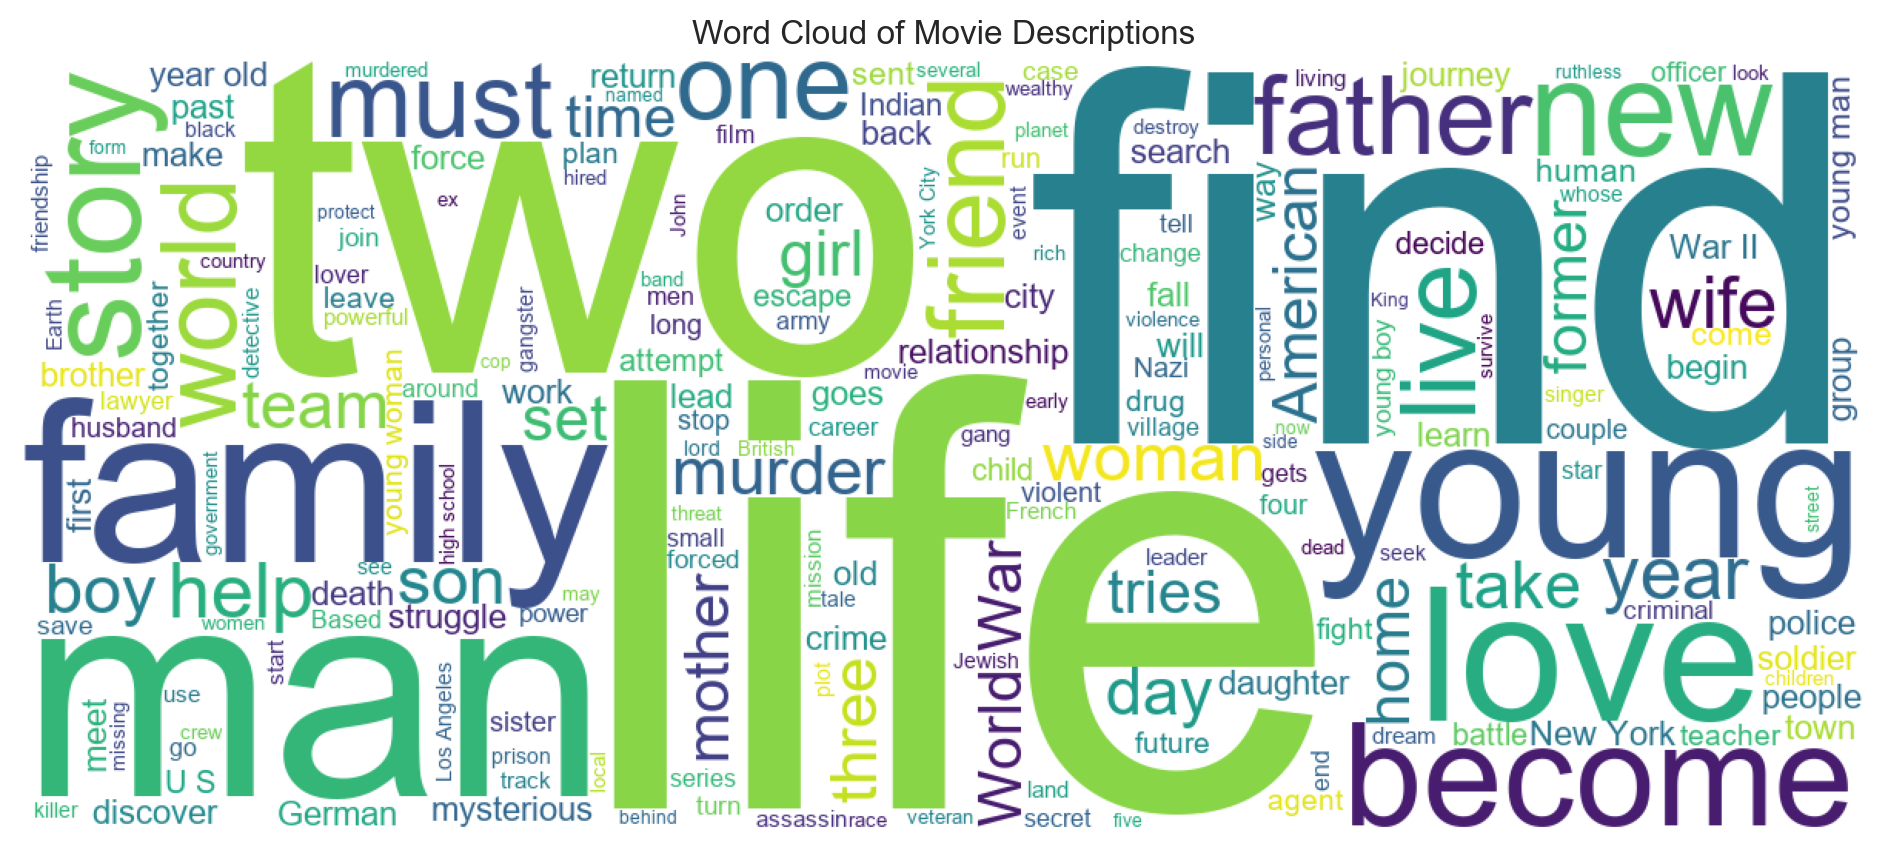

In [61]:
description_text = " ".join(df['Description'].dropna()) 

font_path = 'C:\\Windows\\Fonts\\Arial.ttf' 

wordcloud = WordCloud(width=1200, height=500, background_color='white', font_path=font_path).generate(description_text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, 
           #interpolation='bilinear'
          )
plt.axis('off') 
plt.title('Word Cloud of Movie Descriptions');

**Note:**

The word cloud analysis reveals a captivating pattern in the most prominent words, such as "man," "find," "life," "two," "family," "love," and "become." These words collectively underline the central focus of the top 1000 IMDB movies on the intricacies of the human experience. These movies seem to delve into profound themes, exploring the search for meaning and purpose in life, the dynamics of relationships and family, and the transformative journey that individuals undertake. The prevalence of these terms suggests that the movies within the top 1000 IMDB list resonate with audiences by delving into the essence of what it means to be human, making them both thought-provoking and emotionally compelling.

## 6. Re-summarize Key Insights


After a comprehensive journey through the EDA of the top 1000 IMDb movies, a tapestry of key insights comes to light:

* **The top 1000 IMDb movies are dominated by films from the 1980s onward, reflecting the shift toward modern filmmaking.** However, it is important to note that this trend is not entirely linear. For example, the 1970s also saw a number of critically acclaimed and commercially successful films, such as "The Godfather", "Star Wars", and "Jaws".
* **The average film length is between 90 and 150 minutes, but the duration has been made longer as the year progressed, as well as gross revenue.** This is likely due to a number of factors, such as the increasing complexity of film-making techniques and the rising costs of production.
* **There is a positive correlation between audience ratings and critic ratings, suggesting that audiences and critics generally agree on the quality of these films.** However, as mentioned, there are also some cases where there is a discrepancy between the two. This may be due to the different criteria that audiences and critics use to evaluate films. For example, audiences may be more likely to be swayed by factors such as entertainment value, while critics may be more focused on technical aspects such as cinematography and acting.
* **The content groups are quite balanced for Adults, Teen and All Ages, with film R-rated accounted for the largest part.** This is quite  **fit with the common** **most common themes in these films are life, love, family, and finding oneself I have extracted from the word cloud.** These universal themes can resonate with people of all ages and cultures, regardless of their specific content rating.
* **Top 10 directors and stars also having the same frequency, with international appearnce, while in Directors are two Japanese male directors Akira Kurosawa and Hayao Miyazaki while Actors we see Aamin Khan - an Indian actor having the 10th place.** This suggests that the best films are not limited to any particular country or culture. Instead, they are created by talented filmmakers from all over the world. Yet, there's true that Hollywood films make more gross revenue and receive more attention than films of other regions.